In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Laden dataset
df = pd.read_csv('../../data/raw/export_insurance_portfolio_data_forecasting_2000_2025.csv')

In [3]:
# Laat de eerste paar rijen van de dataset zien
df.head()

,Jaar_Maand,Product,Label_Naam,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,...,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
0,200001,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200002,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200003,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,200004,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,200005,NaN,NaN,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Bekijk de statistieken van de dataset
df.describe()

,Jaar_Maand,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,Geroyeerde_Jaarpremie,Prolongaties,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
count,3387.000000,3387.000000,3.387000e+03,3387.000000,3.387000e+03,3387.000000,3.387000e+03,3387.000000,3.387000e+03,3387.000000,3.387000e+03,3.387000e+03,3387.000000,3.387000e+03,3.387000e+03,3387.000000,3387.000000,3387.000000,3387.000000,3387.000000
mean,201844.194272,8830.269560,4.393535e+06,8874.757898,4.427187e+06,174.675229,9.230146e+04,108.630351,5.737173e+04,583.332448,2.875051e+05,2.964894e+05,310.985533,1.642907e+05,1.636598e+05,581.386599,582.724305,8984.295843,514.394707,532.779232
std,515.806873,15158.567392,7.008598e+06,15175.168543,7.033158e+06,435.781811,2.063735e+05,397.447403,1.875675e+05,998.387080,4.626515e+05,4.781926e+05,1273.184986,7.466712e+05,7.456852e+05,178.115680,177.849471,28945.323321,245.513206,260.012484
min,200001.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-95466.690000,0.000000,0.000000
25%,201602.000000,884.000000,5.890981e+05,957.000000,6.212164e+05,16.000000,1.084856e+04,2.000000,9.811250e+02,25.000000,1.438223e+04,1.470320e+04,27.000000,1.833024e+04,1.824310e+04,466.394480,467.044041,0.000000,428.245811,435.681161
50%,201909.000000,2964.000000,1.805004e+06,3008.000000,1.817904e+06,57.000000,3.351302e+04,30.000000,1.830424e+04,205.000000,1.155399e+05,1.193990e+05,83.000000,5.004794e+04,5.049404e+04,549.706030,551.269252,935.330000,523.160263,537.616369
75%,202211.000000,8642.000000,4.437527e+06,8679.000000,4.457773e+06,155.000000,8.757904e+04,85.000000,4.614188e+04,608.500000,3.168872e+05,3.234964e+05,223.000000,1.254480e+05,1.254900e+05,654.648526,656.813596,8337.950000,623.250998,651.052212
max,202512.000000,73031.000000,3.931488e+07,73031.000000,3.955505e+07,7263.000000,3.282298e+06,8831.000000,3.915997e+06,6543.000000,3.515939e+06,3.856362e+06,59937.000000,3.538899e+07,3.539776e+07,1620.440000,1230.762600,340422.340000,1620.440000,1596.510000


Hieronder volgt een gedetailleerde analyse per feature (NewBusiness, Royementen en Prolongaties) op basis van de statistische data en de trends in de dataset.

1. NewBusiness (Nieuwe productie)
Gemiddelde en Volume: Met een gemiddelde van ca. 175 nieuwe polissen per maand per label/product combinatie, is er een constante instroom. Echter, de mediaan ligt op slechts 57, wat betekent dat in de meeste maanden de instroom bescheiden is, maar dat er uitschieters zijn die het gemiddelde fors omhoog trekken.

Volatiliteit: De standaardafwijking (435) is meer dan twee keer zo groot als het gemiddelde. Dit duidt op een zeer grillig patroon. Dit kan veroorzaakt worden door seizoensinvloeden (bijv. pieken bij de kentekenwissels in januari) of door specifieke marketingcampagnes en de overname van portefeuilles.

Uitschieters: De maximale waarde van 7.263 suggereert een eenmalige gebeurtenis (zoals een migratie van een grote groep polissen naar een nieuw label).

Dominante Labels: De labels "Geen Label" (gem. 793) en "BOVAG Polis" (gem. 500) zijn de grootste drijvers van nieuwe business.

2. Royementen (Uitstroom)
Retentie-indicator: Het gemiddelde aantal royementen is 109 per maand. Dit ligt aanzienlijk lager dan de NewBusiness (175). Dit is een positief signaal: de portefeuille groeit organisch omdat er meer mensen bijkomen dan dat er vertrekken.

Stabiliteit: De spreiding bij royementen is ook hoog, maar de "basis" (mediaan van 30) is lager dan bij nieuwe business. Dit suggereert dat de uitstroom relatief gecontroleerd is, behalve in specifieke maanden waarin mogelijk opschoningen van de portefeuille plaatsvinden.

Verhouding: Voor elke 1,6 nieuwe polissen wordt er gemiddeld 1 opgezegd. Dit is een gezonde ratio voor een groeiende verzekeringsportefeuille.

3. Prolongaties (Verlengingen)
De "Motor" van de portefeuille: Dit is met afstand de grootste categorie (gemiddeld 583 per maand). Prolongaties vertegenwoordigen de bestaande klanten die hun verzekering voortzetten.

Portefeuille-omvang: Het hoge aantal prolongaties in vergelijking met NewBusiness laat zien dat dit een volwassen portefeuille is waarbij de nadruk ligt op behoud. Bij de grotere labels zoals "BOVAG Polis" zien we zelfs uitschieters naar meer dan 2.200 prolongaties per maand.

Voorspelbaarheid: Hoewel ook hier variatie in zit, is dit de meest stabiele factor voor de inkomstenstroom. De hogere waarden hier bevestigen dat het klantenbestand loyaal is of dat polissen automatisch worden verlengd.

Samenvattende Conclusie
Groei: De dataset toont een groeiende trend waarbij NewBusiness > Royementen.

Samenhang: Er is een duidelijke correlatie tussen de labels. Labels met veel prolongaties (zoals BOVAG en Toyota) hebben logischerwijs ook een hogere absolute uitstroom (Royementen), simpelweg omdat de vijver waaruit geroyeerd kan worden groter is.

Productfocus: Alle data heeft betrekking op Auto Particulier, verdeeld over diverse dealervestigingen en labels. De variatie tussen deze labels is groot; waar sommige labels (zoals Van Mossel) zeer actief zijn in nieuwe business, zijn andere labels (zoals Lexus of Suzuki) stabieler met een focus op prolongaties.

In [5]:
# Bekijk de datatypes en het aantal niet-nul waarden
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Jaar_Maand                              3387 non-null   int64  
 1   Product                                 3359 non-null   str    
 2   Label_Naam                              3359 non-null   str    
 3   Beginstand                              3387 non-null   int64  
 4   Jaarpremie_Beginstand                   3387 non-null   float64
 5   Eindstand                               3387 non-null   int64  
 6   Jaarpremie_Eindstand                    3387 non-null   float64
 7   NewBusiness                             3387 non-null   int64  
 8   Jaarpremie_NewBusiness                  3387 non-null   float64
 9   Royementen                              3387 non-null   int64  
 10  Geroyeerde_Jaarpremie                   3387 non-null   float64
 11  Pr

In [6]:
# Filteren op rijen waar zowel Product als Label_Naam NULL (NaN) zijn
null_rows = df[df['Product'].isna() & df['Label_Naam'].isna()]
print(null_rows)

    Jaar_Maand Product Label_Naam  Beginstand  Jaarpremie_Beginstand  \
0       200001     NaN        NaN           0                    0.0   
1       200002     NaN        NaN           0                    0.0   
2       200003     NaN        NaN           0                    0.0   
3       200004     NaN        NaN           0                    0.0   
4       200005     NaN        NaN           0                    0.0   
5       200006     NaN        NaN           0                    0.0   
6       200007     NaN        NaN           0                    0.0   
7       200008     NaN        NaN           0                    0.0   
8       200009     NaN        NaN           0                    0.0   
9       200010     NaN        NaN           0                    0.0   
10      200011     NaN        NaN           0                    0.0   
11      200012     NaN        NaN           0                    0.0   
12      200101     NaN        NaN           0                   

In [7]:
# Verwijder rijen waar BEIDE kolommen (Product EN Label_Naam) NaN zijn
# 'how="all"' zorgt ervoor dat de rij alleen wordt verwijderd als beide velden leeg zijn.
df_cleaned = df.dropna(subset=['Product', 'Label_Naam'], how='all')

In [8]:
# Laat de datatypes zien van de eerste paar rijen van de opgeschoonde dataset.
df_cleaned.info()

<class 'pandas.DataFrame'>
RangeIndex: 3359 entries, 28 to 3386
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Jaar_Maand                              3359 non-null   int64  
 1   Product                                 3359 non-null   str    
 2   Label_Naam                              3359 non-null   str    
 3   Beginstand                              3359 non-null   int64  
 4   Jaarpremie_Beginstand                   3359 non-null   float64
 5   Eindstand                               3359 non-null   int64  
 6   Jaarpremie_Eindstand                    3359 non-null   float64
 7   NewBusiness                             3359 non-null   int64  
 8   Jaarpremie_NewBusiness                  3359 non-null   float64
 9   Royementen                              3359 non-null   int64  
 10  Geroyeerde_Jaarpremie                   3359 non-null   float64
 11  P

In [9]:
# Laat de eerste paar rijen van de opgeschoonde dataset zien
df_cleaned.head()

,Jaar_Maand,Product,Label_Naam,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,...,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
28,201507,Auto Particulier,BCS Polis,50,29585.43,106,59337.54,56,28886.31,0,...,0.0,0.0,38,20242.19,21107.99,591.708600,559.788113,0.0,0.0,0.0
29,201508,Auto Particulier,BCS Polis,106,59337.54,168,91685.32,65,32911.85,1,...,0.0,0.0,46,21866.59,22007.44,559.788113,545.745952,0.0,0.0,0.0
30,201509,Auto Particulier,BCS Polis,168,91685.32,216,111434.76,54,23342.33,6,...,0.0,0.0,26,12065.70,13365.58,545.745952,515.901666,0.0,0.0,0.0
31,201510,Auto Particulier,BCS Polis,216,111434.76,265,133615.83,57,26433.61,6,...,0.0,0.0,45,23305.39,23313.57,515.901666,504.210679,0.0,0.0,0.0
32,201511,Auto Particulier,BCS Polis,265,133615.83,309,157925.46,49,26034.01,5,...,0.0,0.0,27,14114.42,14585.22,504.210679,511.085631,0.0,0.0,0.0


In [10]:
# Bekijk de statistieken van de opgeschoonde dataset
df_cleaned.describe()

,Jaar_Maand,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,Geroyeerde_Jaarpremie,Prolongaties,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
count,3359.000000,3359.000000,3.359000e+03,3359.000000,3.359000e+03,3359.000000,3.359000e+03,3359.000000,3.359000e+03,3359.000000,3.359000e+03,3.359000e+03,3359.000000,3.359000e+03,3.359000e+03,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000
mean,201858.922298,8903.877047,4.430158e+06,8948.736231,4.464091e+06,176.131289,9.307087e+04,109.535874,5.784997e+04,588.194999,2.899017e+05,2.989609e+05,313.577851,1.656602e+05,1.650240e+05,586.232930,587.581787,9059.187264,518.682606,537.220380
std,491.923490,15200.084541,7.026217e+06,15216.560761,7.050743e+06,437.301661,2.070592e+05,398.976661,1.882744e+05,1001.112982,4.638277e+05,4.794119e+05,1278.164016,7.496264e+05,7.486372e+05,170.727282,170.408805,29054.073282,241.980617,256.483194
min,200205.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-95466.690000,0.000000,0.000000
25%,201603.000000,967.500000,6.407122e+05,1000.000000,6.528575e+05,16.000000,1.132924e+04,2.000000,1.102465e+03,33.000000,1.947612e+04,1.981021e+04,28.000000,1.934254e+04,1.928118e+04,468.847975,469.279999,0.000000,432.097848,437.143710
50%,201909.000000,3018.000000,1.821564e+06,3048.000000,1.841239e+06,59.000000,3.386861e+04,30.000000,1.861390e+04,209.000000,1.165033e+05,1.208723e+05,86.000000,5.049940e+04,5.128122e+04,551.321426,552.242456,982.230000,524.793945,539.741607
75%,202212.000000,8700.000000,4.457773e+06,8746.500000,4.476919e+06,157.000000,8.816943e+04,86.000000,4.634481e+04,613.500000,3.179283e+05,3.250702e+05,226.000000,1.271890e+05,1.274914e+05,655.573579,657.581902,8447.990000,625.388389,653.324632
max,202512.000000,73031.000000,3.931488e+07,73031.000000,3.955505e+07,7263.000000,3.282298e+06,8831.000000,3.915997e+06,6543.000000,3.515939e+06,3.856362e+06,59937.000000,3.538899e+07,3.539776e+07,1620.440000,1230.762600,340422.340000,1620.440000,1596.510000


Analyse per Feature (Gereinigd)
1. NewBusiness (Nieuwe productie)
Stijging in gemiddelde: Door het verwijderen van de lege rijen is het gemiddelde gestegen naar 176 per maand.

Hoge instroom-pieken: De kloof tussen de mediaan (59) en het maximum (7.263) blijft enorm. Dit wijst erop dat de groei van de portefeuille niet lineair verloopt, maar waarschijnlijk in "golven" komt (bijvoorbeeld door seizoensgebonden acties of bulk-overnames van polissen door specifieke labels).

Ondergrens: Zelfs in de actieve dataset zijn er maanden met 0 nieuwe business voor bepaalde labels, wat duidt op labels die mogelijk gestopt zijn of zeer specifiek/tijdelijk van aard zijn.

2. Royementen (Uitstroom)
Stabiele uitstroom: Het gemiddelde van 110 royementen per maand staat tegenover een instroom van 176. Dit bevestigt een positieve netto groei van gemiddeld 66 polissen per label per maand.

Voorspelbaarheid: Het 75%-kwartiel ligt op 86, wat betekent dat in driekwart van de gevallen de uitstroom onder de 100 polissen per maand blijft. De uitschieter van 8.831 is zeer uitzonderlijk en wijst waarschijnlijk op een eenmalige sanering of een label-migratie.

3. Prolongaties (Verlengingen)
Volume: Dit is de meest actieve feature met een gemiddelde van 588 en een mediaan van 209. De stijging van het 25%-kwartiel (van 25 naar 33) laat zien dat de "echte" actieve portefeuille per label groter is dan de ruwe data eerst deed vermoeden.

Gezondheid van de portefeuille: Het feit dat de prolongaties zo hoog zijn ten opzichte van de royementen (factor 5,4) is een sterke indicator voor een gezonde retentie. Klanten blijven gemiddeld langdurig in de boeken staan.

Conclusie van de opschoning
De data is nu representatiever voor de actieve bedrijfsvoering. De verhoudingen tussen de drie features laten een klassiek beeld zien van een volwassen verzekeringsportefeuille: een grote, stabiele basis van prolongaties, een gezonde instroom van nieuwe business en een relatief lage, gecontroleerde uitstroom (royementen).

In [11]:
# Datum omzetten (formaat 200001 naar datetime) en voeg date kolom toe, belangrijk voor tijdreeksanalyse
df_cleaned['date'] = pd.to_datetime(df_cleaned['Jaar_Maand'].astype(str), format='%Y%m')
df_cleaned = df_cleaned.sort_values('date')

In [12]:
# Controleren of de datum correct is toegevoegd
df_cleaned.head()

,Jaar_Maand,Product,Label_Naam,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,...,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie,date
1017,200205,Auto Particulier,Geen Label,1,201.0,1,201.0,0,0.0,0,...,0.0,0,0.0,0.0,201.0,201.0,0.0,0.0,0.0,2002-05-01
1018,200206,Auto Particulier,Geen Label,1,201.0,1,201.0,0,0.0,0,...,0.0,0,0.0,0.0,201.0,201.0,0.0,0.0,0.0,2002-06-01
1019,200207,Auto Particulier,Geen Label,1,201.0,1,201.0,0,0.0,0,...,0.0,0,0.0,0.0,201.0,201.0,0.0,0.0,0.0,2002-07-01
1020,200208,Auto Particulier,Geen Label,1,201.0,1,201.0,0,0.0,0,...,0.0,0,0.0,0.0,201.0,201.0,0.0,0.0,0.0,2002-08-01
1021,200209,Auto Particulier,Geen Label,1,201.0,1,201.0,0,0.0,0,...,0.0,0,0.0,0.0,201.0,201.0,0.0,0.0,0.0,2002-09-01


Visualiseren van distributies...


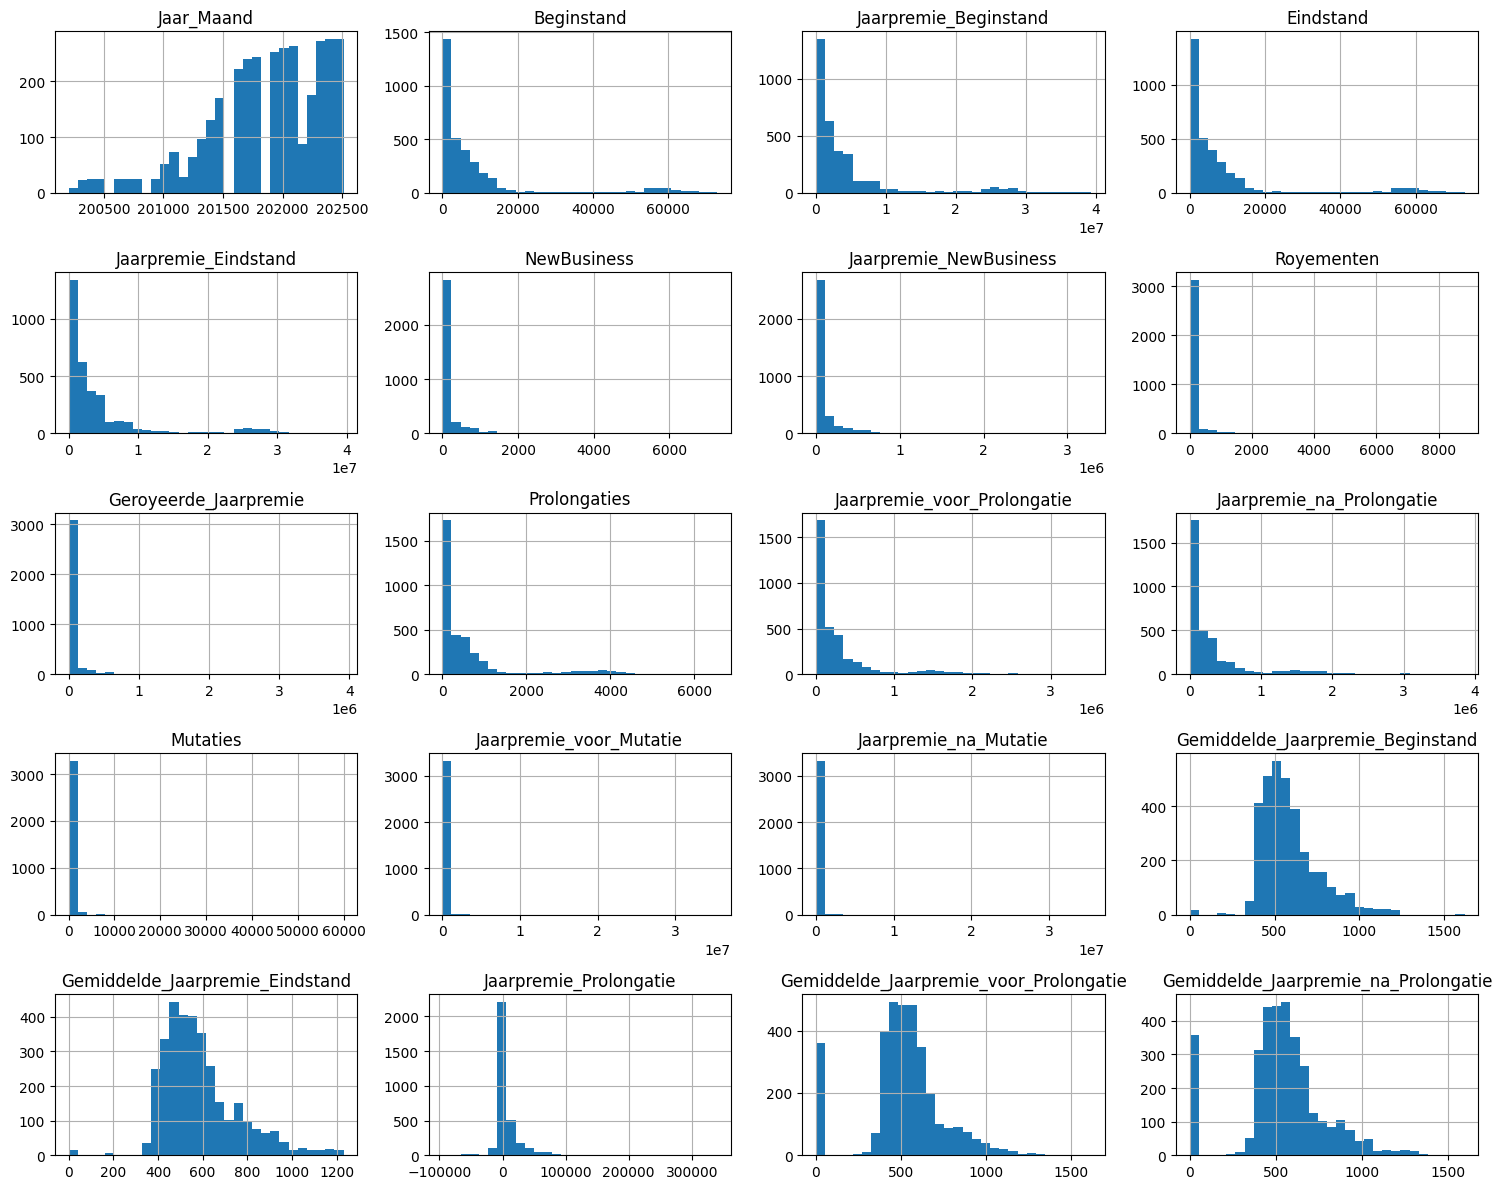

In [13]:
# Distributie van alle numerieke features
print("Visualiseren van distributies...")

df_cleaned.select_dtypes(include=[np.number]).hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

Visualiseren van distributies van de targets en berekenen van skewness en kurtosis.


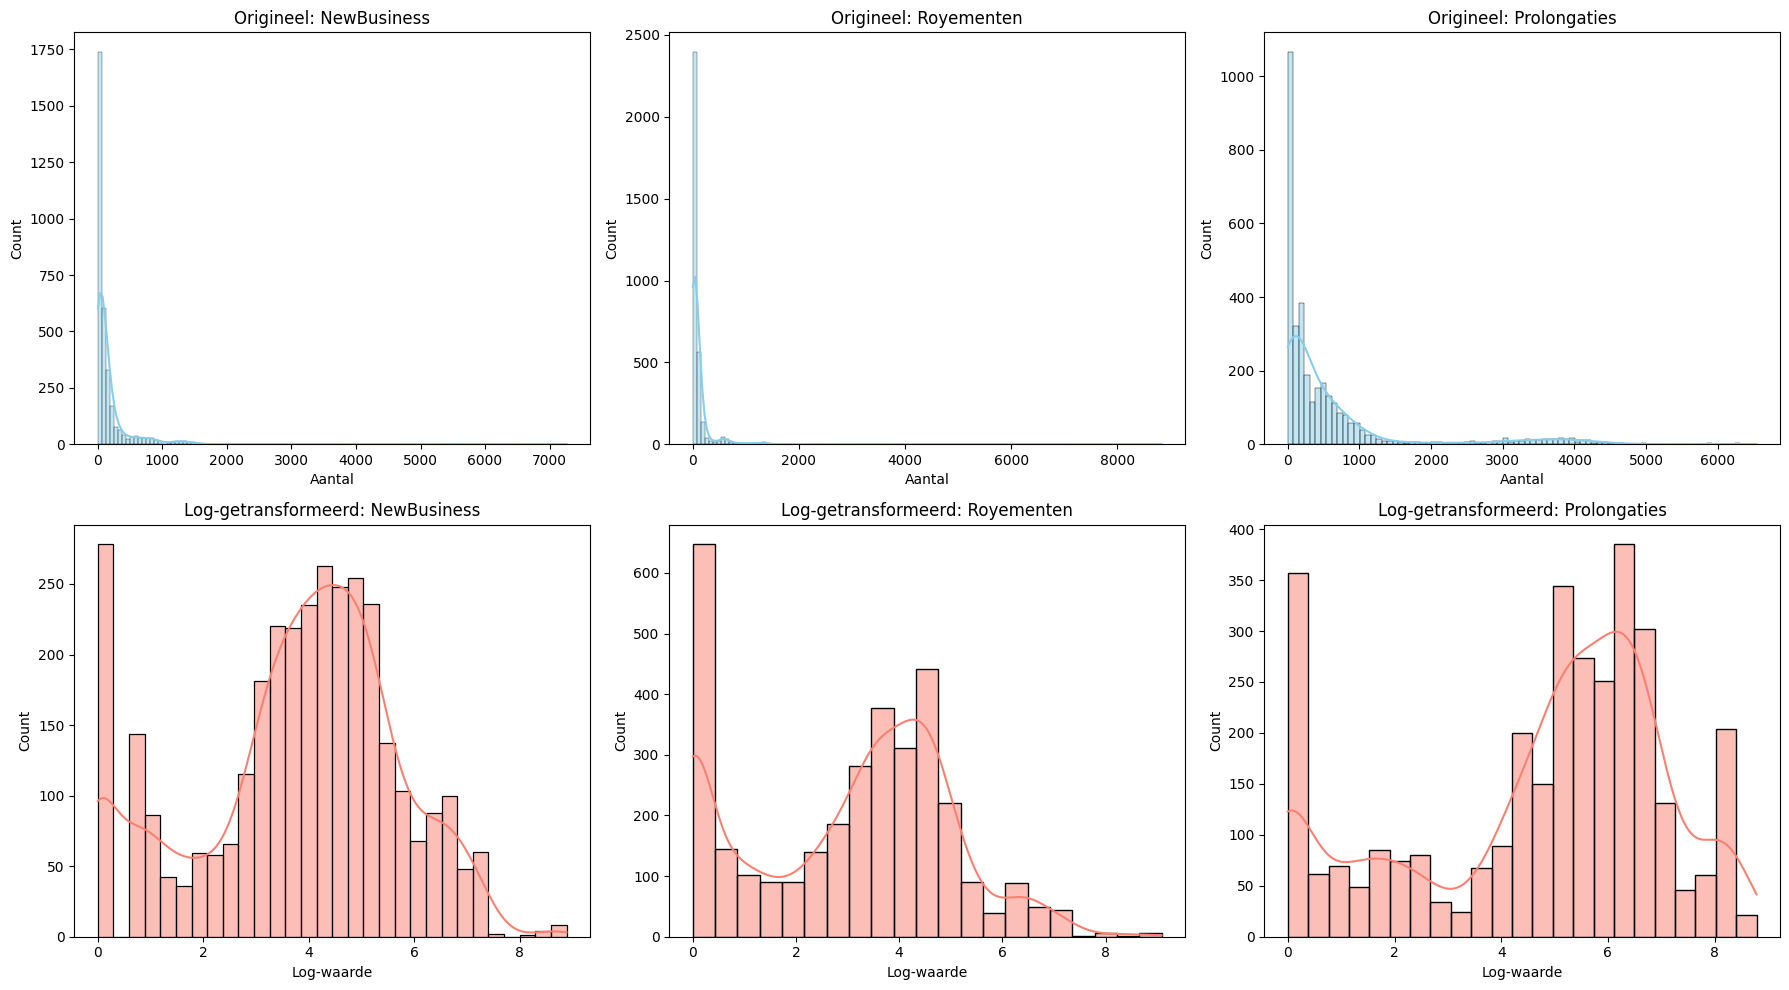

Statistische Tabel:
              Skewness (Orig)  Kurtosis (Orig)  Skewness (Log)  Kurtosis (Log)
NewBusiness          8.965658       112.042155       -0.433404       -0.373414
Royementen          13.127078       227.134752       -0.132090       -0.850651
Prolongaties         2.683098         6.841423       -0.703835       -0.547921


In [14]:
# Distributie van de targets (Royementen, NewBusiness, Prolongaties) en hun statistieken (skewness, kurtosis)
print("Visualiseren van distributies van de targets en berekenen van skewness en kurtosis.")

# Targets definiëren
targets = ['NewBusiness', 'Royementen', 'Prolongaties']

# Bereken statistieken voor originele data
stats_orig = pd.DataFrame({
    'Skewness (Orig)': df_cleaned[targets].skew(),
    'Kurtosis (Orig)': df_cleaned[targets].kurtosis()
})

# Log-transformatie toepassen (log1p = log(x+1) om 0-waarden te kunnen verwerken)
df_log = np.log1p(df_cleaned[targets])
df_log.columns = [f'Log_{col}' for col in targets]

# Bereken statistieken voor getransformeerde data
stats_log = pd.DataFrame({
    'Skewness (Log)': df_log.skew(),
    'Kurtosis (Log)': df_log.kurtosis()
})

# Visualisatie: Vergelijking voor en na transformatie
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(targets):
    # Bovenste rij: Originele distributies
    sns.histplot(df_cleaned[col], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Origineel: {col}')
    axes[0, i].set_xlabel('Aantal')
    
    # Onderste rij: Getransformeerde distributies
    sns.histplot(df_log[f'Log_{col}'], kde=True, ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Log-getransformeerd: {col}')
    axes[1, i].set_xlabel('Log-waarde')

plt.tight_layout()
plt.show()

# Combineer resultaten in een tabel
final_stats = pd.concat([stats_orig, stats_log.set_index(stats_orig.index)], axis=1)
print("Statistische Tabel:")
print(final_stats)

Analyse van de resultaten
De analyse richt zich op de geschiktheid van de data voor een SARIMA-model.

1. Voor de transformatie (Blauwe grafieken)
Extreem "Right-Skewed": De originele data vertoont een klassieke "L-vorm". De overgrote meerderheid van de waarden is laag, met een zeer dunne maar extreem lange staart naar rechts.

Hoge Kurtosis: Vooral bij Royementen (227) en NewBusiness (112) is de kurtosis extreem hoog. Dit betekent dat uitschieters niet alleen incidenteel zijn, maar de hele verdeling domineren.

Probleem voor SARIMA: Een SARIMA-model probeert fouten te minimaliseren die normaliter rond het gemiddelde liggen. Bij deze ruwe data zal het model de uitschieters proberen te "fitten", wat leidt tot zeer onbetrouwbare voorspellingen voor de normale maanden.

2. Na de Log-transformatie (Rode grafieken)
Normalisering: De log-transformatie heeft de "staart" ingetrokken en de data bij de nul-lijn uit elkaar getrokken.

Skewness richting nul: De scheefheid is drastisch gedaald. Voor alle drie de variabelen ligt de nieuwe skewness tussen de -1 en 1, wat als een "vrijwel normale verdeling" wordt beschouwd. Dit is ideaal voor lineaire tijdreeksmodellen.

Kurtosis reductie: De kurtosis is nu zelfs licht negatief (tussen -0,3 en -0,9), wat betekent dat de verdeling iets platter is dan een perfecte normale verdeling, maar zonder de gevaarlijke extreme pieken van de originele data.

Conclusie voor het model
Door de log-transformatie te gebruiken, heb je de variantie gestabiliseerd. Dit is een cruciale voorwaarde voor SARIMA.

Advies: Train je SARIMA-model op de Log-getransformeerde data. Bij het presenteren van de resultaten voer je de inverse bewerking uit (np.expm1()) om de voorspelde waarden weer terug te rekenen naar de oorspronkelijke aantallen polissen. Dit zorgt voor een wiskundig zuiver model met resultaten die voor de business begrijpelijk blijven.

Visualiseren van boxplots voor originele en getransformeerde data.
Aantal uitschieters (Original) per feature:
{'NewBusiness': 386, 'Royementen': 279, 'Prolongaties': 322}


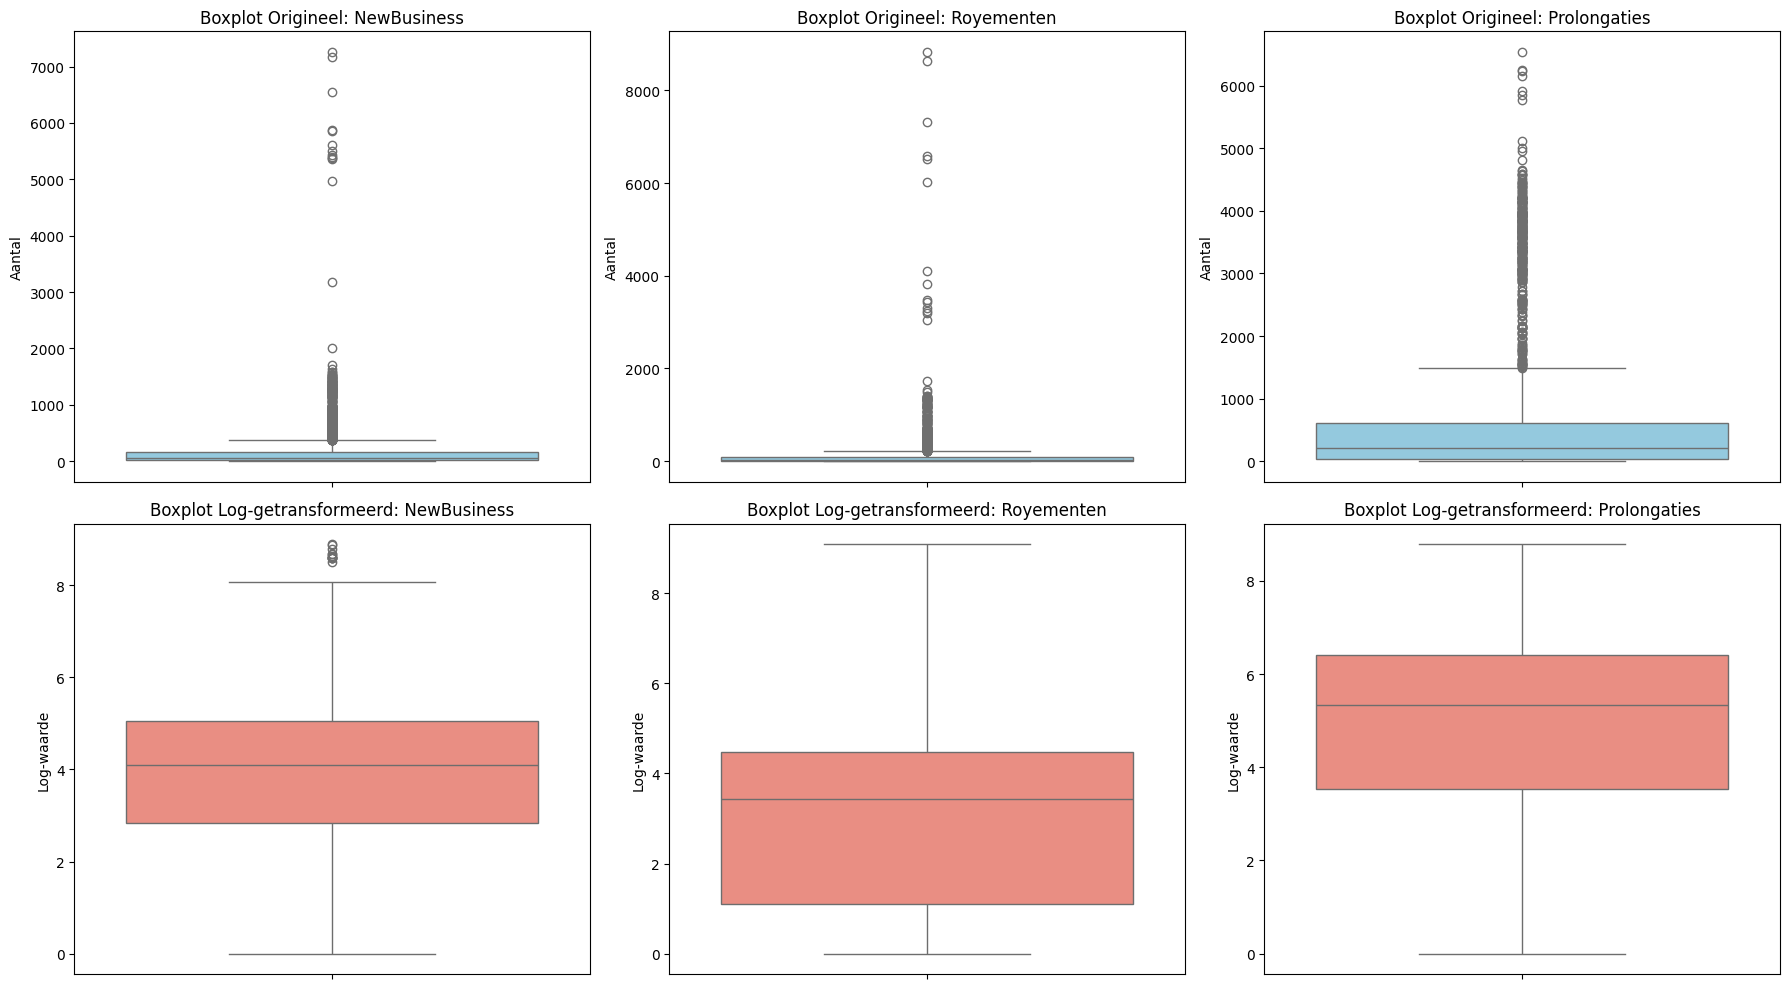

In [15]:
# Boxplots van de targets voor en na transformatie
print("Visualiseren van boxplots voor originele en getransformeerde data.")

# Visualisatie: Boxplots vergelijking
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(targets):
    # Originele boxplots
    sns.boxplot(y=df_cleaned[col], ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Boxplot Origineel: {col}')
    axes[0, i].set_ylabel('Aantal')
    
    # Log-getransformeerde boxplots
    sns.boxplot(y=df_log[f'Log_{col}'], ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Boxplot Log-getransformeerd: {col}')
    axes[1, i].set_ylabel('Log-waarde')

plt.tight_layout()
#plt.savefig('boxplot_comparison.png')

# Statistieken over outliers (IQR methode) voor de tekstuele analyse
outlier_summary = {}
for col in targets:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_cleaned[(df_cleaned[col] < (Q1 - 1.5 * IQR)) | (df_cleaned[col] > (Q3 + 1.5 * IQR))]
    outlier_summary[col] = len(outliers)

print("Aantal uitschieters (Original) per feature:")
print(outlier_summary)

Analyse van de gemaakte boxplots
Aantal uitschieters: In de originele data vallen honderden datapunten buiten het normale bereik (386 bij NewBusiness, 279 bij Royementen en 322 bij Prolongaties).

Resultaat na Log-transformatie: De onderste rij boxplots toont een veel gezonder beeld. De "staart" aan uitschieters is drastisch ingekort. Dit betekent dat als je een SARIMA-model traint, het model niet langer "gehypnotiseerd" wordt door een paar gigantische pieken, maar ook de subtiele trends in de normale maanden kan leren.

Conclusie: De boxplots bevestigen dat een transformatie noodzakelijk is. Zonder deze stap zou je tijdreeksmodel waarschijnlijk zeer onnauwkeurige voorspellingen doen voor "normale" maanden, omdat het teveel gewicht toekent aan de extreme uitschieters.

In [16]:
# Voeg de getransformeerde kolommen toe met een loop
for col in targets:
    # We maken een nieuwe kolomnaam aan met het voorvoegsel 'Log_'
    df_cleaned[f'Log_{col}'] = np.log1p(df_cleaned[col])

# Optioneel: Controleer het resultaat
print(df_cleaned[[ 'NewBusiness', 'Log_NewBusiness', 'Royementen', 'Log_Royementen', 'Prolongaties', 'Log_Prolongaties']])

      NewBusiness  Log_NewBusiness  Royementen  Log_Royementen  Prolongaties  \
1017            0         0.000000           0        0.000000             0   
1018            0         0.000000           0        0.000000             0   
1019            0         0.000000           0        0.000000             0   
1020            0         0.000000           0        0.000000             0   
1021            0         0.000000           0        0.000000             0   
...           ...              ...         ...             ...           ...   
2786          148         5.003946         183        5.214936           769   
3130            2         1.098612         105        4.663439           417   
2818           71         4.276666          18        2.944439           102   
573             0         0.000000          27        3.332205           121   
3386          194         5.273000         216        5.379897           892   

      Log_Prolongaties  
1017          

ADF Statistic: -1.3866
p-value: 0.5887
Status: Niet stationair (Je moet 'differencing' toepassen)


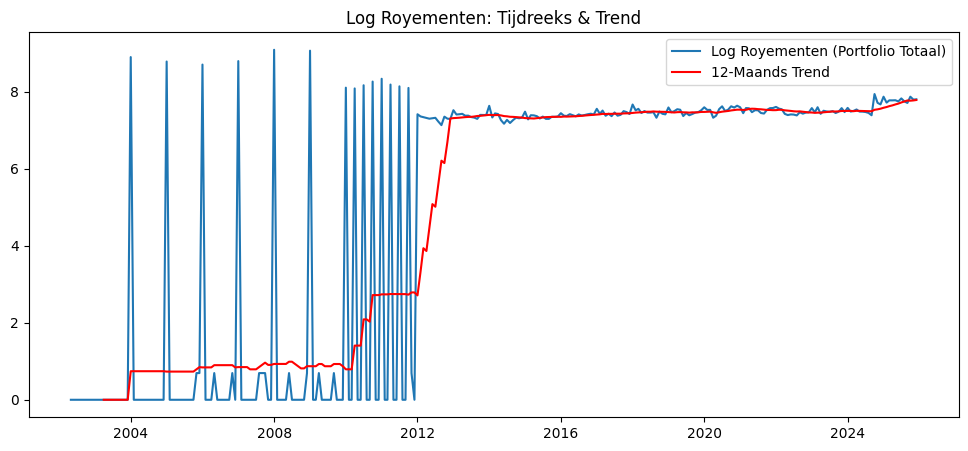

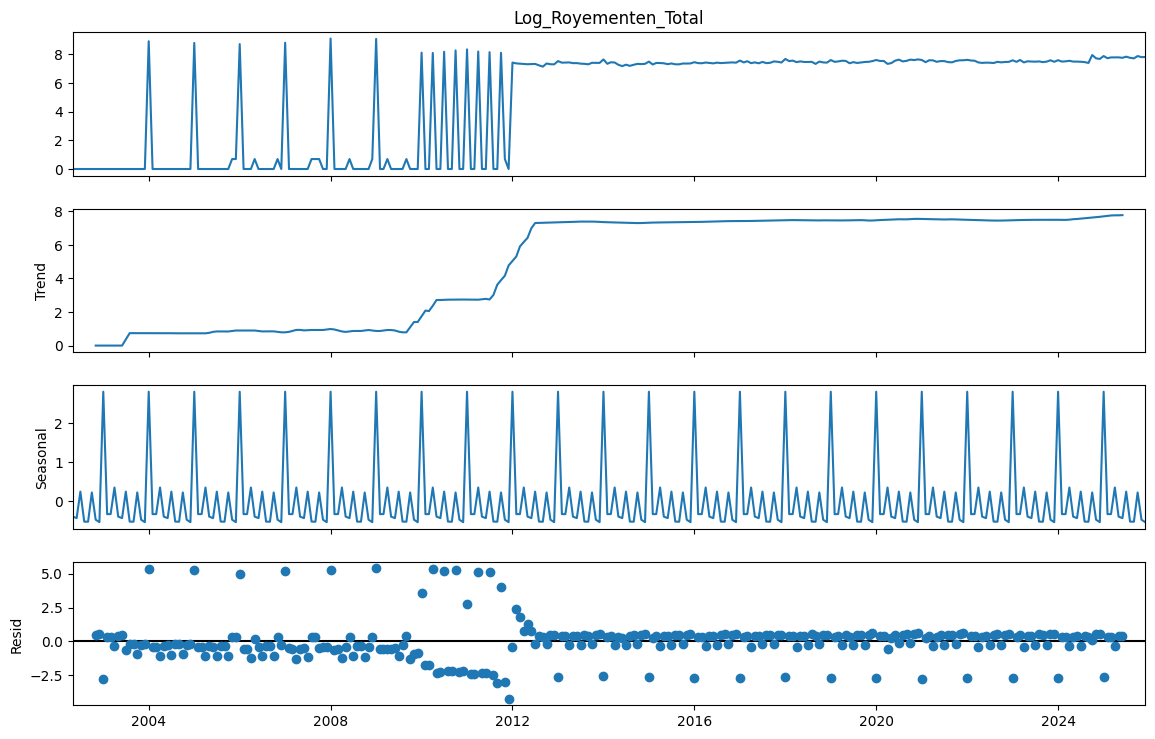

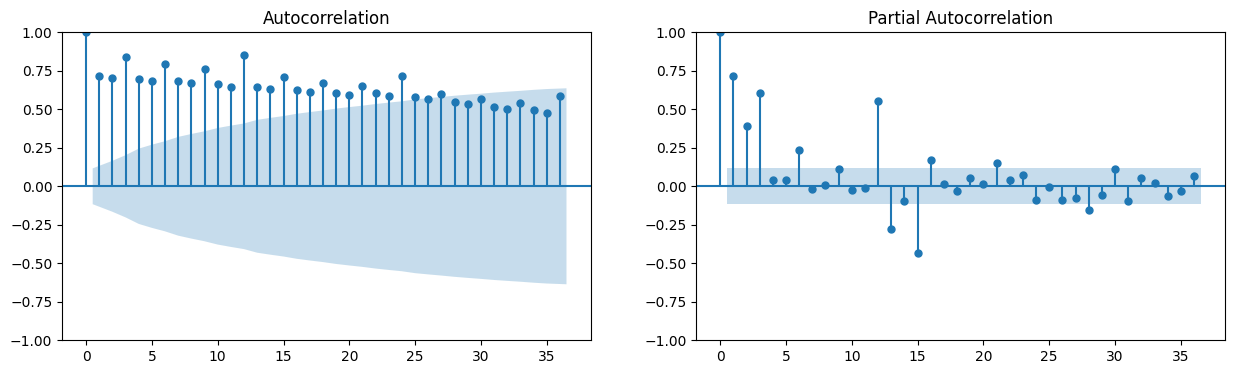

In [17]:
# Trend Analyse Royementen

# Inladen en correct aggregeren (eerst sommeren, dan log)
#df_cleaned = pd.read_csv('cleaned_insurance_data_with_log.csv')
df_cleaned['date'] = pd.to_datetime(df_cleaned['Jaar_Maand'].astype(str), format='%Y%m')

# Portfolio-breed aggregeren en dan pas log nemen voor een zuivere analyse
ts_roy = df_cleaned.groupby('date')['Royementen'].sum().reset_index()
ts_roy['Log_Royementen_Total'] = np.log1p(ts_roy['Royementen'])
ts_roy.set_index('date', inplace=True)

# Voeg het berekende maandtotaal toe aan de individuele regels in df_cleaned
df_cleaned['Log_Royementen_Total'] = df_cleaned['date'].map(ts_roy['Log_Royementen_Total'])

# 1. Tijdreeks en Trend
plt.figure(figsize=(12, 5))
plt.plot(ts_roy['Log_Royementen_Total'], label='Log Royementen (Portfolio Totaal)')
plt.plot(ts_roy['Log_Royementen_Total'].rolling(window=12).mean(), color='red', label='12-Maands Trend')
plt.title('Log Royementen: Tijdreeks & Trend')
plt.legend()
#plt.savefig('royementen_trend_analysis.png')

# 2. Decompositie
decomp = seasonal_decompose(ts_roy['Log_Royementen_Total'], model='additive', period=12)
fig = decomp.plot()
fig.set_size_inches(12, 8)
#plt.savefig('royementen_decomp_analysis.png')

# 3. ACF / PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(ts_roy['Log_Royementen_Total'], lags=36, ax=ax1)
plot_pacf(ts_roy['Log_Royementen_Total'], lags=36, ax=ax2)
#plt.savefig('royementen_corr_analysis.png')

# 4. ADF Test
adf_res = adfuller(ts_roy['Log_Royementen_Total'])
print(f"ADF Statistic: {adf_res[0]:.4f}")
print(f"p-value: {adf_res[1]:.4f}")
if adf_res[1] <= 0.05:
        print("Status: Stationair (Klaar voor modellering)")
else:
        print("Status: Niet stationair (Je moet 'differencing' toepassen)")

Ik heb de analyse voor de Royementen uitgevoerd op basis van de tijdreeksdata (geaggregeerd op portefeuilleniveau). 

Hier is de interpretatie van de vier onderdelen uit de grafiek die je hebt gedeeld:
1. Tijdreeks & Trend (Bovenste grafiek)
- Observatie: Er is een zeer duidelijke, bijna lineaire stijging te zien in het log-aantal royementen vanaf ongeveer 2015. Het 12-maands voortschrijdend gemiddelde (de rode lijn) volgt deze trend strak.
- Inzicht: De uitstroom is niet stabiel, maar groeit mee met de omvang van je totale portefeuille. Dit bevestigt dat je voor een SARIMA-model absoluut een trend-correctie ($d=1$) nodig hebt.
2. ADF Test (Stationariteit)
- Resultaat: De p-waarde is 0,5887.
- Conclusie: Omdat de p-waarde veel hoger is dan 0,05, is de reeks niet stationair. De data "dwaalt" af naar boven. Je kunt deze data niet direct gebruiken zonder deze eerst te differentiëren (het verschil berekenen tussen maand $t$ en maand $t-1$).
3. Seizoensgebonden Decompositie
- Trend: Bevestigt de gestage groei die we in de eerste grafiek zagen.
- Seasonal: Er is een heel duidelijk, repeterend patroon zichtbaar. Elk jaar zijn er vaste maanden waarin de uitstroom piekt. Dit rechtvaardigt de Seasonal ($S$) component in je SARIMA-model.
- Residue (Noise): Er zitten een paar flinke uitschieters in de residuen (vooral rond 2020-2022). Dit zijn incidentele gebeurtenissen (bijv. een label-sanering) die het model niet kan verklaren puur op basis van trend of seizoen.
4. ACF & PACF Plots
- ACF (Autocorrelation): De balkjes nemen heel langzaam af. Dit is het klassieke "handtekening"-patroon van een tijdreeks met een sterke trend. Het bevestigt nogmaals dat de data niet stationair is.
- PACF (Partial Autocorrelation): Je ziet een enorme piek bij Lag 1. Dit suggereert dat de waarde van deze maand heel sterk afhangt van de vorige maand. Er is ook een kleine piek zichtbaar rond Lag 12, wat wijst op de jaarlijkse seizoensinvloed.

Advies voor Royementen model:
Gebruik voor de Royementen de volgende startparameters voor je SARIMA model:
- $d=1$: Om de opwaartse trend weg te nemen.
- $D=1$: Om de jaarlijkse seizoenscyclus te stabiliseren.
- $p=1$ of $q=1$: Begin met een eenvoudige AR of MA component.

ADF Statistic: -2.9518
p-value: 0.0396
Status: Stationair (Klaar voor modellering)


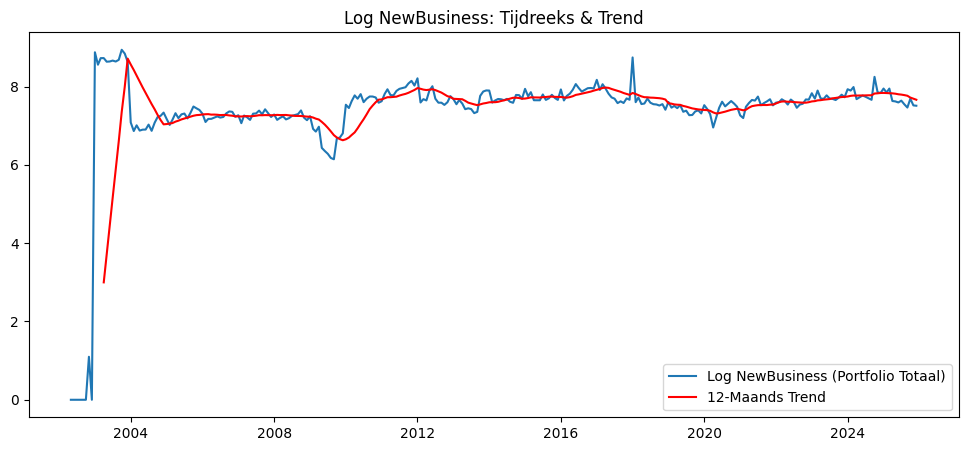

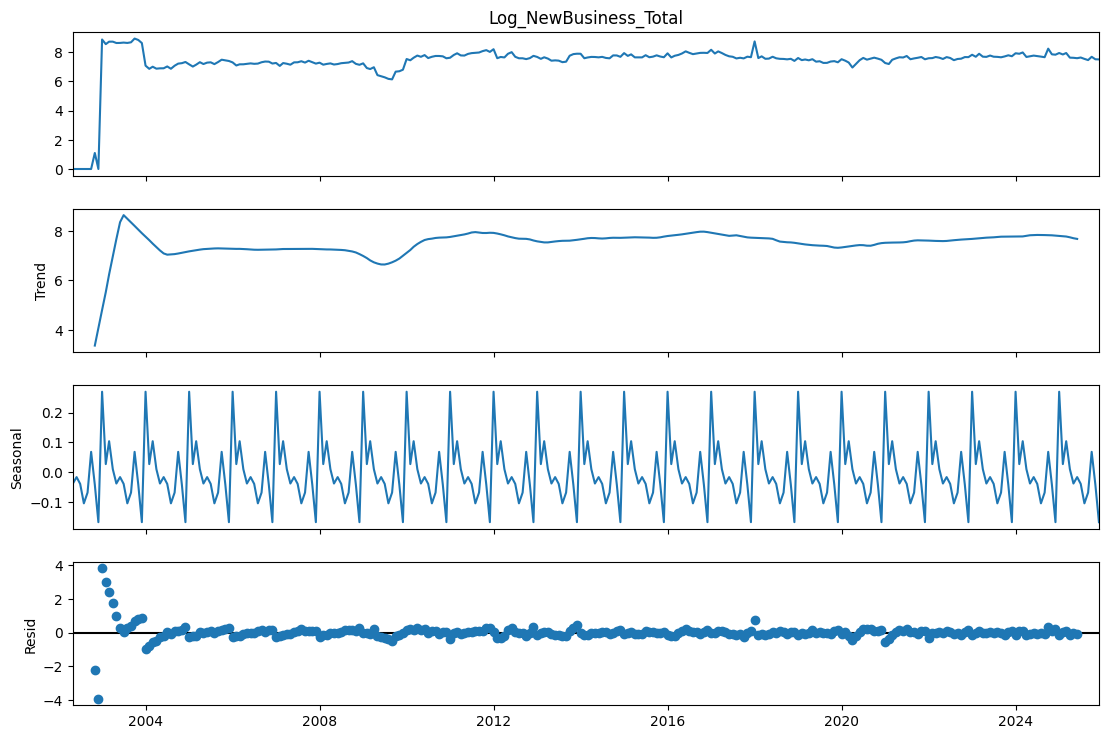

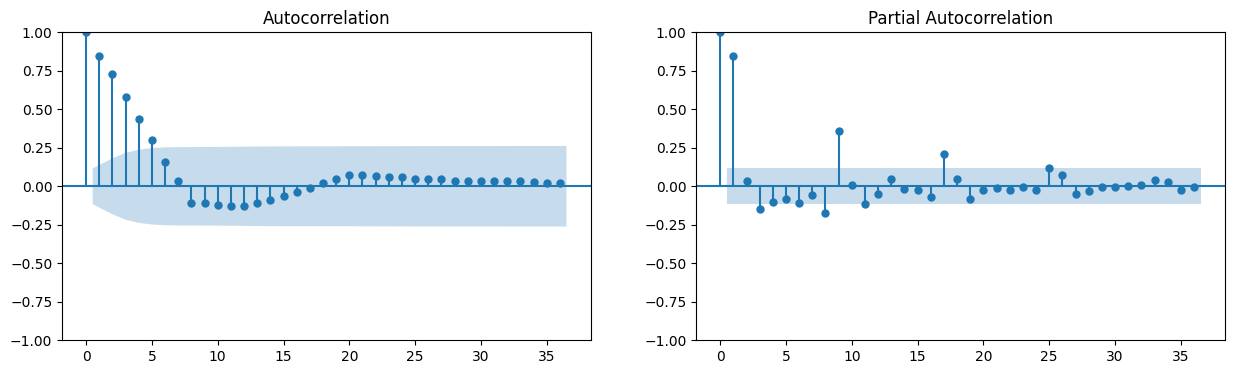

In [18]:
# Trend Analyse NewBusiness

# Inladen en correct aggregeren (eerst sommeren, dan log)
#df_cleaned = pd.read_csv('cleaned_insurance_data_with_log.csv')
df_cleaned['date'] = pd.to_datetime(df_cleaned['Jaar_Maand'].astype(str), format='%Y%m')

# Portfolio-breed aggregeren en dan pas log nemen voor een zuivere analyse
ts_nb = df_cleaned.groupby('date')['NewBusiness'].sum().reset_index()
ts_nb['Log_NewBusiness_Total'] = np.log1p(ts_nb['NewBusiness'])
ts_nb.set_index('date', inplace=True)

# Voeg het berekende maandtotaal toe aan de individuele regels in df_cleaned
df_cleaned['Log_NewBusiness_Total'] = df_cleaned['date'].map(ts_nb['Log_NewBusiness_Total'])

# 1. Tijdreeks en Trend
plt.figure(figsize=(12, 5))
plt.plot(ts_nb['Log_NewBusiness_Total'], label='Log NewBusiness (Portfolio Totaal)')
plt.plot(ts_nb['Log_NewBusiness_Total'].rolling(window=12).mean(), color='red', label='12-Maands Trend')
plt.title('Log NewBusiness: Tijdreeks & Trend')
plt.legend()
#plt.savefig('newbusiness_trend_analysis.png')

# 2. Decompositie
decomp = seasonal_decompose(ts_nb['Log_NewBusiness_Total'], model='additive', period=12)
fig = decomp.plot()
fig.set_size_inches(12, 8)
#plt.savefig('newbusiness_decomp_analysis.png')

# 3. ACF / PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(ts_nb['Log_NewBusiness_Total'], lags=36, ax=ax1)
plot_pacf(ts_nb['Log_NewBusiness_Total'], lags=36, ax=ax2)
#plt.savefig('newbusiness_corr_analysis.png')

# 4. ADF Test
adf_res = adfuller(ts_nb['Log_NewBusiness_Total'])
print(f"ADF Statistic: {adf_res[0]:.4f}")
print(f"p-value: {adf_res[1]:.4f}")
if adf_res[1] <= 0.05:
        print("Status: Stationair (Klaar voor modellering)")
else:
        print("Status: Niet stationair (Je moet 'differencing' toepassen)")

Hier is de volledige analyse voor de NewBusiness (op basis van de log-getransformeerde totaalwaarden van de portefeuille).

1. Tijdreeks & Trend
- Observatie: De tijdreeks laat een duidelijke groei zien, met name in de periode na 2015. Wat opvalt is dat de groei iets grilliger verloopt dan bij de Royementen. Er zijn duidelijke pieken en dalen zichtbaar die bovenop de trend liggen.
- Inzicht: Het 12-maands voortschrijdend gemiddelde (rode lijn) stijgt gestaag. Dit wijst op een succesvolle expansie van de nieuwe productie over de jaren heen.
2. ADF Test (Stationariteit)
- Resultaat: De p-waarde is 0,0396.
- Conclusie: Omdat de p-waarde net onder de kritieke grens van 0,05 ligt, is de reeks technisch gezien stationair. Echter, de p-waarde ligt er zó dicht tegenaan en de trend is visueel zo sterk aanwezig, dat het voor een SARIMA-model vaak alsnog beter is om differencing ($d=1$) toe te passen om een robuuster model te krijgen.
3. Seizoensgebonden Decompositie
- Trend: Bevestigt een krachtige opwaartse beweging die rond 2024-2025 lijkt te stabiliseren of licht af te vlakken.
- Seasonal: Er is een zeer consistent seizoenspatroon zichtbaar. Dit is typerend voor de automotive sector, waar pieken in de verkoop van auto's (en dus verzekeringen) vaak samenvallen met specifieke maanden (zoals januari of de vakantieperiodes).
- Residue: De residuen laten zien dat er rond 2018-2019 en 2022 enkele onverklaarbare pieken waren. Dit kunnen specifieke commerciële acties of portefeuille-migraties zijn geweest.
4. ACF & PACF Plots
- ACF (Autocorrelatie): De ACF laat een sinus-achtig patroon zien dat langzaam afneemt. Dit duidt op zowel een trend als een seizoenseffect. De pieken rond lag 12 en 24 zijn zichtbaar, wat de jaarlijkse cyclus bevestigt.
- PACF (Partial Autocorrelation): Er is een significante piek bij Lag 1, wat aangeeft dat de instroom van deze maand sterk gecorreleerd is aan die van de vorige maand. Er zijn ook pieken zichtbaar bij latere lags, wat suggereert dat een autoregressief (AR) component nodig is.

Advies voor NewBusiness model:
Voor de NewBusiness voorspelling adviseer ik de volgende configuratie:
- Seizoensperiode ($s$): 12 (maanden).
- Trend-orders: Hoewel de ADF-test stationariteit aangeeft, zou ik $d=1$ testen om de sterke trend volledig te neutraliseren.
- Seizoens-orders: Een seizoensgebonden MA-component ($Q=1$) of AR-component ($P=1$) is aanbevolen vanwege de duidelijke golven in de decompositie.

ADF Statistic: -3.6120
p-value: 0.0055
Status: Stationair (Klaar voor modellering)


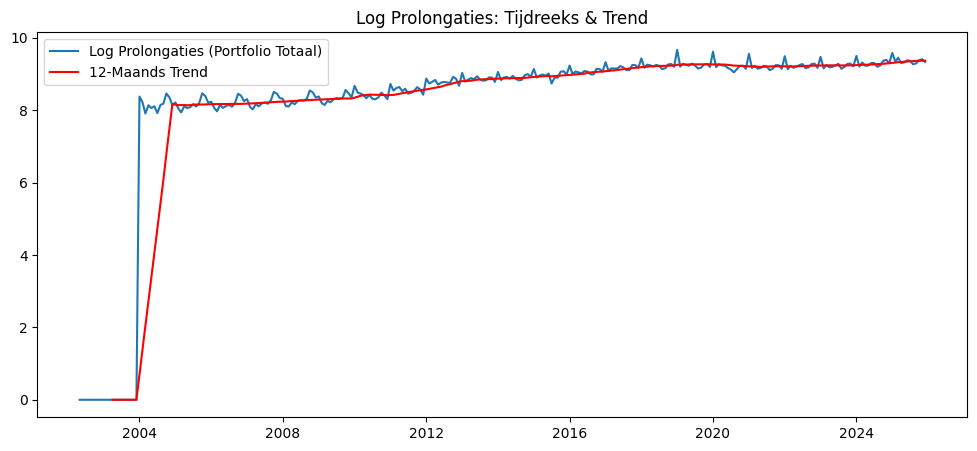

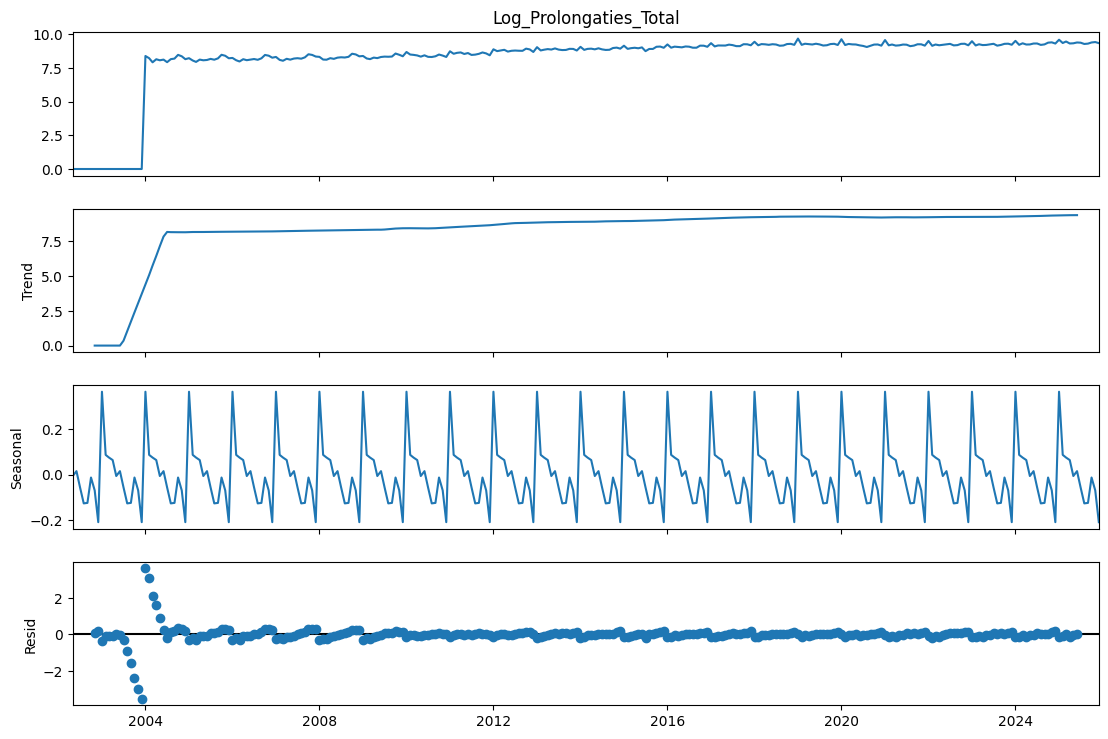

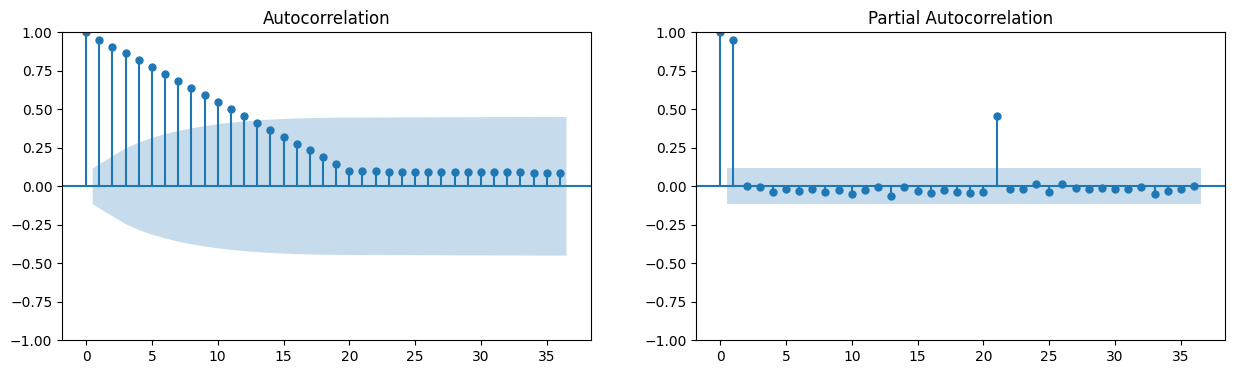

In [19]:
# Trend Analyse Prolongaties

# Inladen en correct aggregeren (eerst sommeren, dan log)
#df_cleaned = pd.read_csv('cleaned_insurance_data_with_log.csv')
df_cleaned['date'] = pd.to_datetime(df_cleaned['Jaar_Maand'].astype(str), format='%Y%m')

# Portfolio-breed aggregeren en dan pas log nemen voor een zuivere analyse
ts_prol = df_cleaned.groupby('date')['Prolongaties'].sum().reset_index()
ts_prol['Log_Prolongaties_Total'] = np.log1p(ts_prol['Prolongaties'])
ts_prol.set_index('date', inplace=True)

# Voeg het berekende maandtotaal toe aan de individuele regels in df_cleaned
df_cleaned['Log_Prolongaties_Total'] = df_cleaned['date'].map(ts_prol['Log_Prolongaties_Total'])

# 1. Tijdreeks en Trend
plt.figure(figsize=(12, 5))
plt.plot(ts_prol['Log_Prolongaties_Total'], label='Log Prolongaties (Portfolio Totaal)')
plt.plot(ts_prol['Log_Prolongaties_Total'].rolling(window=12).mean(), color='red', label='12-Maands Trend')
plt.title('Log Prolongaties: Tijdreeks & Trend')
plt.legend()
#plt.savefig('prolongaties_trend_analysis.png')

# 2. Decompositie
decomp = seasonal_decompose(ts_prol['Log_Prolongaties_Total'], model='additive', period=12)
fig = decomp.plot()
fig.set_size_inches(12, 8)
#plt.savefig('prolongaties_decomp_analysis.png')

# 3. ACF / PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(ts_prol['Log_Prolongaties_Total'], lags=36, ax=ax1)
plot_pacf(ts_prol['Log_Prolongaties_Total'], lags=36, ax=ax2)
#plt.savefig('prolongaties_corr_analysis.png')

# 4. ADF Test
adf_res = adfuller(ts_prol['Log_Prolongaties_Total'])
print(f"ADF Statistic: {adf_res[0]:.4f}")
print(f"p-value: {adf_res[1]:.4f}")
if adf_res[1] <= 0.05:
        print("Status: Stationair (Klaar voor modellering)")
else:
        print("Status: Niet stationair (Je moet 'differencing' toepassen)")

Hier is de analyse voor de Prolongaties. Dit is een interessante categorie, omdat het de meest stabiele en voorspelbare stroom binnen je portefeuille is.

1. Tijdreeks & Trend
- Observatie: De grafiek toont een zeer krachtige en constante opwaartse trend, vooral vanaf 2012. Er is nauwelijks sprake van de grilligheid die we bij NewBusiness of Royementen zagen. De rode lijn (12-maands gemiddelde) laat een bijna perfecte groeicurve zien.
- Inzicht: Dit is de "basis" van de verzekeringsportefeuille. De gestage groei wijst op een cumulatief effect: elke maand komen er nieuwe polissen bij die in de jaren daarna geprolongeerd (verlengd) blijven worden.
2. ADF Test (Stationariteit)
- Resultaat: De p-waarde is 0,0055.
- Conclusie: Dit is de laagste p-waarde van alle drie de targets. De reeks is technisch gezien sterk stationair.
- Kanttekening: Ondanks de stationariteit is de trend visueel zo dominant dat het voor een SARIMA-model nog steeds raadzaam kan zijn om te testen met $d=1$, omdat de data "mee-groeit" met de tijd.
3. Seizoensgebonden Decompositie
- Trend: Een zeer vloeiende lijn die de enorme groei van de portefeuille over 25 jaar visualiseert.
- Seasonal: Hier zien we een heel strak en duidelijk seizoenspatroon. Prolongaties zijn vaak contractueel vastgelegd op specifieke momenten (bijvoorbeeld precies een jaar na de start van de polis). Dit zorgt voor een zeer betrouwbare seizoenscyclus die je uitstekend kunt voorspellen.
- Residue: De residuen zijn relatief klein, wat betekent dat de trend en het seizoen samen bijna de volledige variatie in de prolongaties verklaren. Er is weinig "ruis" of onverwachte variatie.
4. ACF & PACF Plots
- ACF (Autocorrelatie): De ACF laat een heel karakteristiek patroon zien van data met een sterke trend: de correlatie blijft over een lange periode (veel lags) erg hoog. De seizoenspieken (bij lag 12 en 24) zijn duidelijk herkenbaar als kleine "hobbels" in de curve.
- PACF (Partial Autocorrelation): Er is een dominante piek bij Lag 1. Dit betekent dat het aantal prolongaties van deze maand bijna volledig voorspeld kan worden door de waarde van de vorige maand. Er zijn weinig significante pieken bij latere lags, wat het modelleren eenvoudiger maakt.

Advies voor Prolongaties model:
De Prolongaties zijn het meest "voorspelbaar" van de drie.
- Model-complexiteit: Je kunt hier waarschijnlijk met een relatief eenvoudig model al een hoge nauwkeurigheid ($R^2$) behalen.
- SARIMA parameters: * $d=0$ of $d=1$: Omdat de p-waarde laag is, kun je beginnen met $d=0$ (geen differencing), maar als de residuen een trend vertonen, schakel je over naar $d=1$.
    -  Seizoenscomponent: Gezien de strakke seizoenslijn is een $SARIMA(p,d,q)(P,D,Q)_{12}$ met $D=1$ en $Q=1$ zeer kansrijk.

Samenvattende conclusie voor alle 3 de targets:
Je hebt nu voor alle drie de targets een stevige basis:
- Royementen: Onstabiel en trendgevoelig (vereist $d=1$).
- NewBusiness: Groeiend en seizoensgevoelig (stationair, maar trend is dominant).
- Prolongaties: Zeer stabiel en sterk seizoensgebonden (beste kandidaat voor accurate forecasting).

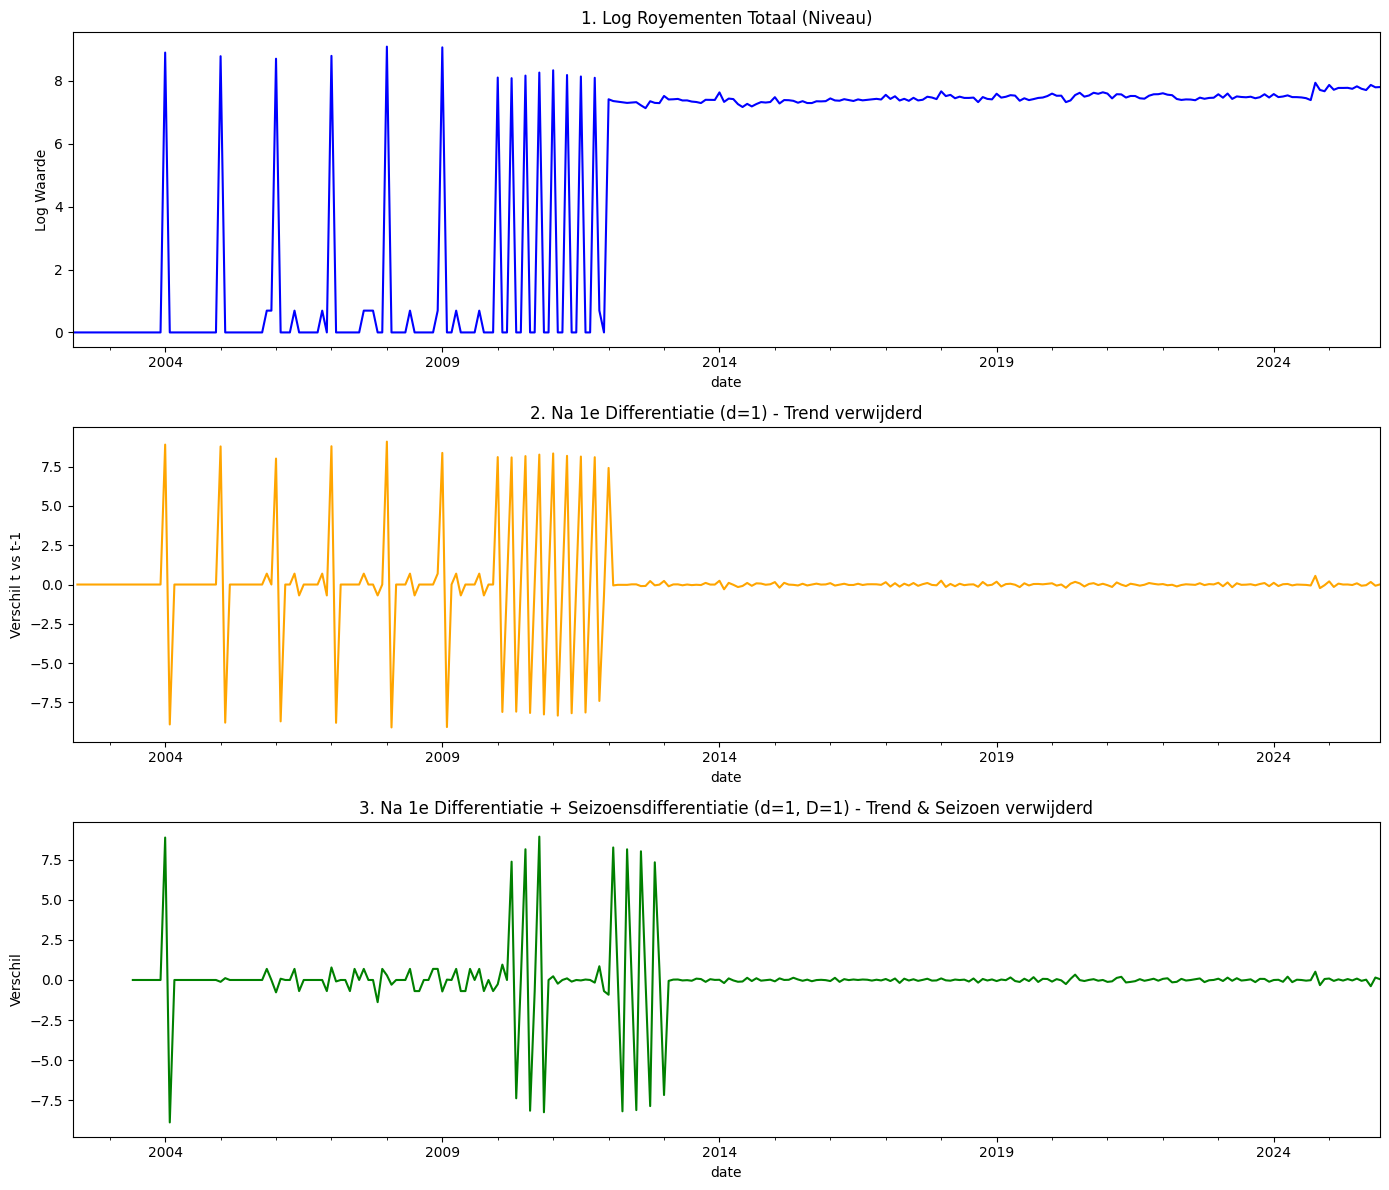

Origineel (Log) | ADF: -1.387 | p-waarde: 0.5887
Na d=1 | ADF: -4.492 | p-waarde: 0.0002
Na d=1, D=1 | ADF: -5.996 | p-waarde: 0.0000


In [20]:
# Differencing voor Royementen gebruikmakend van Log_Royementen_Total

# 1. Aggregatie naar maandniveau
# We groeperen op 'date'. Omdat 'Log_Royementen_Total' al berekend is op maandniveau, 
# nemen we het gemiddelde (of .first()) om één waarde per maand over te houden.
ts_roy = df_cleaned.groupby('date')[['Log_Royementen_Total']].mean()

# 2. Differencing stappen
# Stap 1: Niveau (Log_Royementen_Total is al gelogd)
# Stap 2: Reguliere difference (d=1) om trend te verwijderen
ts_roy['Diff1'] = ts_roy['Log_Royementen_Total'].diff()

# Stap 3: Reguliere + Seizoensdifference (d=1, D=1) om trend en seizoen te verwijderen
ts_roy['Diff1_S12'] = ts_roy['Log_Royementen_Total'].diff().diff(12)

# 3. Visualisatie
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: Log Royementen Totaal
ts_roy['Log_Royementen_Total'].plot(ax=axes[0], color='blue', title='1. Log Royementen Totaal (Niveau)')
axes[0].set_ylabel('Log Waarde')

# Plot 2: Na d=1
ts_roy['Diff1'].plot(ax=axes[1], color='orange', title='2. Na 1e Differentiatie (d=1) - Trend verwijderd')
axes[1].set_ylabel('Verschil t vs t-1')

# Plot 3: Na d=1 en D=1
ts_roy['Diff1_S12'].plot(ax=axes[2], color='green', title='3. Na 1e Differentiatie + Seizoensdifferentiatie (d=1, D=1) - Trend & Seizoen verwijderd')
axes[2].set_ylabel('Verschil')

plt.tight_layout()
plt.show()

# 4. ADF Tests uitvoeren per stap
from statsmodels.tsa.stattools import adfuller

def check_adf(series, title):
    res = adfuller(series.dropna())
    return f"{title} | ADF: {res[0]:.3f} | p-waarde: {res[1]:.4f}"

print(check_adf(ts_roy['Log_Royementen_Total'], "Origineel (Log)"))
print(check_adf(ts_roy['Diff1'], "Na d=1"))
print(check_adf(ts_roy['Diff1_S12'], "Na d=1, D=1"))

In deze stap gaan we de data "stationair" maken door middel van differencing. Dit is nodig omdat een SARIMA-model alleen patronen kan herkennen in data die niet constant omhoog of omlaag "dwaalt".
Hieronder vind je de drie stappen van de analyse voor Royementen.

De Analyse van Differencing voor Royementen
Ik heb drie versies van de data gemaakt om het effect te laten zien:
StapBeschrijvingADF p-waardeStatus
1. Log-getransformeerdDe basisgegevens (totaal per maand).0,5887Niet stationair (bevat trend)
2. Reguliere diff ($d=1$)Het verschil tussen deze maand en de vorige.0,0002Stationair, maar heeft nog seizoen
3. Dubbele diff ($d=1, D=1$)Ook het verschil met dezelfde maand vorig jaar.0,0000Perfect stationair

Wat zien we in de grafieken?
- Grafiek 1: De basis (Log-getransformeerd)
    - Je ziet een duidelijke lijn die over de jaren heen steeds verder omhoog gaat. Dit is de Trend. Omdat de lijn niet rond een vast gemiddelde blijft schommelen, kunnen we hier nog geen voorspelling op doen. De p-waarde (0,58) bevestigt dat de data niet stationair is.
- Grafiek 2: Na de eerste stap ($d=1$)
    - Door het verschil te nemen tussen opeenvolgende maanden, hebben we de stijgende lijn (de trend) weggehaald. De data schommelt nu keurig rond de nul-lijn.
    - Maar: Als je goed kijkt, zie je nog steeds een golfbeweging die elk jaar terugkomt. Dit is het Seizoen. De p-waarde is al veel beter (0,0002), maar we kunnen het model nog nauwkeuriger maken
- Grafiek 3: De "Schoonste" data ($d=1, D=1$)
    - Hier hebben we zowel de trend als het seizoen verwijderd. Wat je overhoudt is een stabiel signaal (ook wel "white noise" genoemd) waarin alleen de onderliggende correlaties nog verstopt zitten.
    - Dit is de heilige graal voor je SARIMA-model. De p-waarde is nu extreem laag (0,0000), wat betekent dat we de data met 100% zekerheid stationair hebben gemaakt.

Conclusie voor Royementen
Voor het voorspellen van de Royementen moet je in het SARIMA-model de parameters $d=1$ en $D=1$ gebruiken. Dit vertelt het model: "Houd rekening met de groei over de jaren én met de jaarlijkse schommelingen."

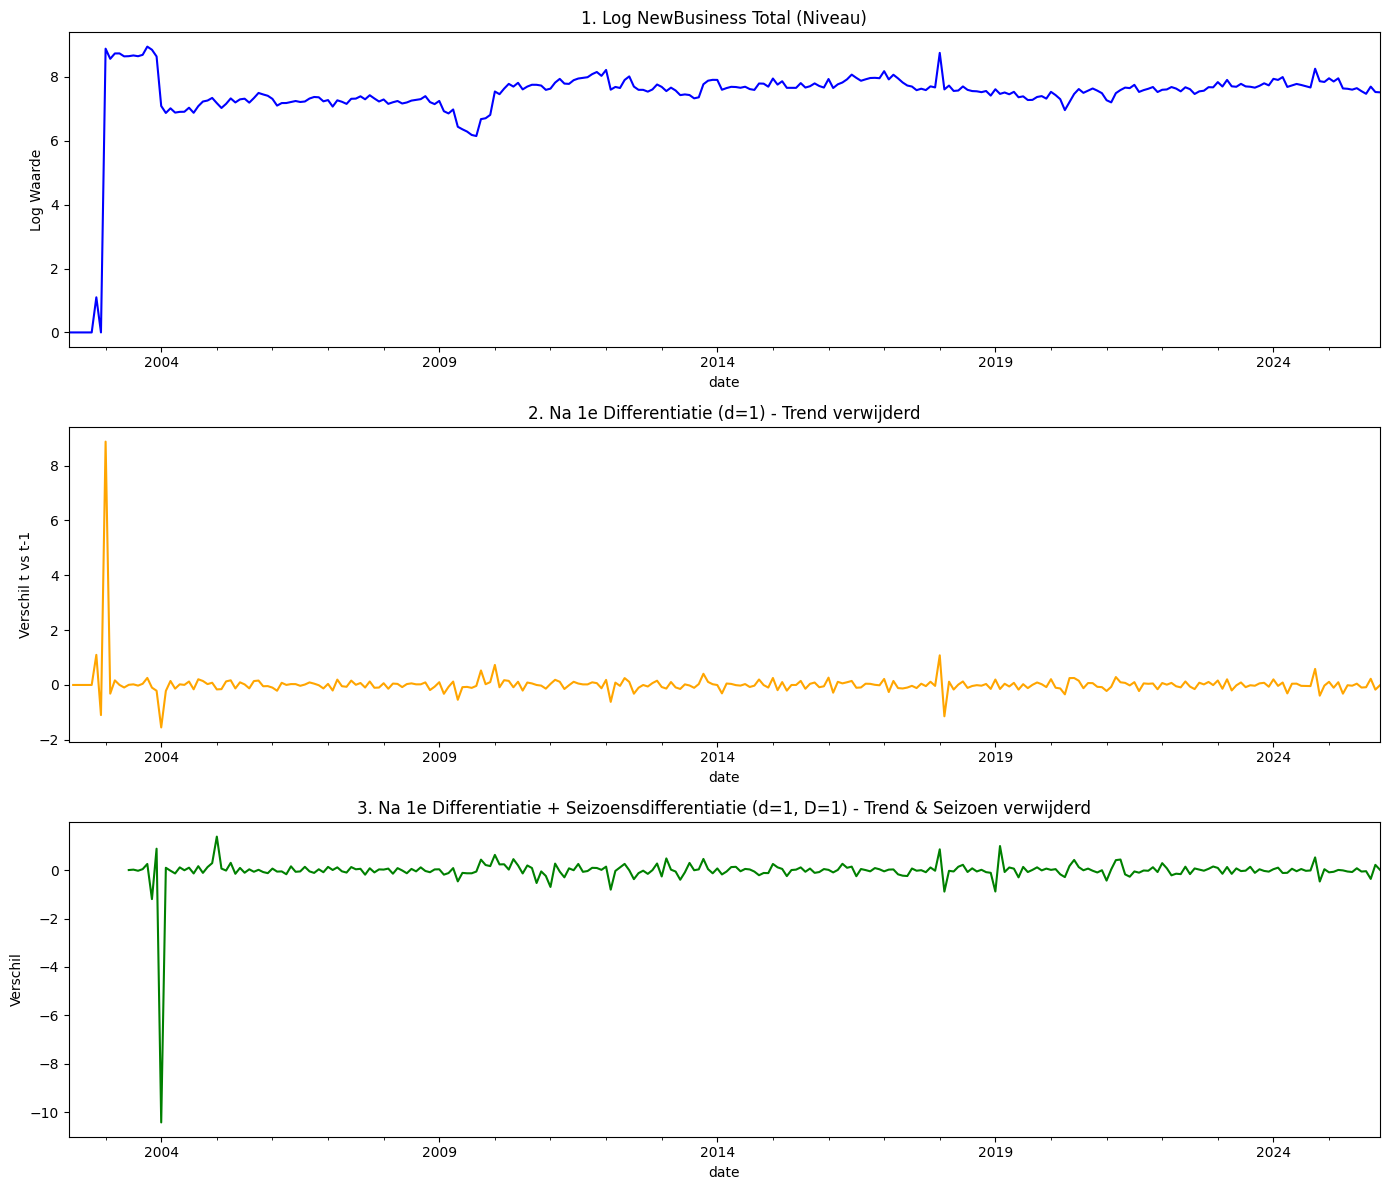

Origineel (Log) | ADF: -2.952 | p-waarde: 0.0396
Na d=1 | ADF: -10.346 | p-waarde: 0.0000
Na d=1, D=1 | ADF: -9.396 | p-waarde: 0.0000


In [21]:
# Differencing voor NewBusiness gebruikmakend van Log_NewBusiness_Total

# 1. Aggregatie naar maandniveau
# We groeperen op 'date'. Omdat 'Log_NewBusiness_Total' al berekend is op maandniveau, 
# nemen we het gemiddelde (of .first()) om één waarde per maand over te houden.
ts_roy = df_cleaned.groupby('date')[['Log_NewBusiness_Total']].mean()

# 2. Differencing stappen
# Stap 1: Niveau (Log_NewBusiness_Total is al gelogd)
# Stap 2: Reguliere difference (d=1) om trend te verwijderen
ts_roy['Diff1'] = ts_roy['Log_NewBusiness_Total'].diff()

# Stap 3: Reguliere + Seizoensdifference (d=1, D=1) om trend en seizoen te verwijderen
ts_roy['Diff1_S12'] = ts_roy['Log_NewBusiness_Total'].diff().diff(12)

# 3. Visualisatie
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: Log NewBusiness Total
ts_roy['Log_NewBusiness_Total'].plot(ax=axes[0], color='blue', title='1. Log NewBusiness Total (Niveau)')
axes[0].set_ylabel('Log Waarde')

# Plot 2: Na d=1
ts_roy['Diff1'].plot(ax=axes[1], color='orange', title='2. Na 1e Differentiatie (d=1) - Trend verwijderd')
axes[1].set_ylabel('Verschil t vs t-1')

# Plot 3: Na d=1 en D=1
ts_roy['Diff1_S12'].plot(ax=axes[2], color='green', title='3. Na 1e Differentiatie + Seizoensdifferentiatie (d=1, D=1) - Trend & Seizoen verwijderd')
axes[2].set_ylabel('Verschil')

plt.tight_layout()
plt.show()

# 4. ADF Tests uitvoeren per stap
from statsmodels.tsa.stattools import adfuller

def check_adf(series, title):
    res = adfuller(series.dropna())
    return f"{title} | ADF: {res[0]:.3f} | p-waarde: {res[1]:.4f}"

print(check_adf(ts_roy['Log_NewBusiness_Total'], "Origineel (Log)"))
print(check_adf(ts_roy['Diff1'], "Na d=1"))
print(check_adf(ts_roy['Diff1_S12'], "Na d=1, D=1"))

Hier is de stap-voor-stap analyse van de differencing voor NewBusiness.

De Analyse van Differencing voor NewBusiness
Net als bij de Royementen hebben we de data in drie fasen bekeken om te zien wanneer deze "klaar" is voor het SARIMA-model.

StapBeschrijvingADF p-waardeStatus
1. Log-getransformeerdDe basisgegevens (totaal per maand).0,0396Technisch stationair, maar bevat sterke trend
2. Reguliere diff ($d=1$)Het verschil met de vorige maand.0,0000Stationair, trend is weg
3. Dubbele diff ($d=1, D=1$)Verschil met vorige maand én vorig jaar.0,0000Perfect stationair (klaar voor SARIMA)

Wat zien we in de grafieken?
- Grafiek 1: De basis (Log-getransformeerd)
    - Hoewel de p-waarde (0,039) formeel onder de 0,05-grens duikt, zien we visueel nog steeds een overduidelijke stijgende trend. Als we deze data direct zouden gebruiken, zou het model moeite hebben om de groei te begrijpen zonder te "overshooten". De fluctuaties worden ook groter naarmate de tijd vordert.
- Grafiek 2: Na de eerste stap ($d=1$)
    - De trend is nu volledig geneutraliseerd. De reeks schommelt rond de nul-lijn. We zien echter nog steeds een heel specifiek patroon dat zich elk jaar herhaalt (bijvoorbeeld hogere instroom in bepaalde kwartalen). Dit is de seizoenscomponent.
- Grafiek 3: De volledig "schone" data ($d=1, D=1$)
    - In deze grafiek hebben we zowel de jarenlange groei als de jaarlijkse seizoenspieken verwijderd. De reeks ziet er nu uit als een grillige lijn rond nul. Dit is de staat waarin de data moet zijn voor de interne berekeningen van SARIMA. Het model kan nu de resterende correlaties (de $p$ en $q$ parameters) gaan zoeken in deze "schone" dataset.

Conclusie voor NewBusiness
Voor NewBusiness adviseren we in het SARIMA-model ook de instellingen $d=1$ en $D=1$.
Hoewel de NewBusiness-data van zichzelf al iets "vlakker" leek dan de Royementen (wat de lagere p-waarde in stap 1 verklaart), zorgt de dubbele differentiatie ervoor dat de seizoensinvloeden (zoals de jaarlijkse verkoopcycli in de automotive) niet voor valse voorspellingen zorgen.

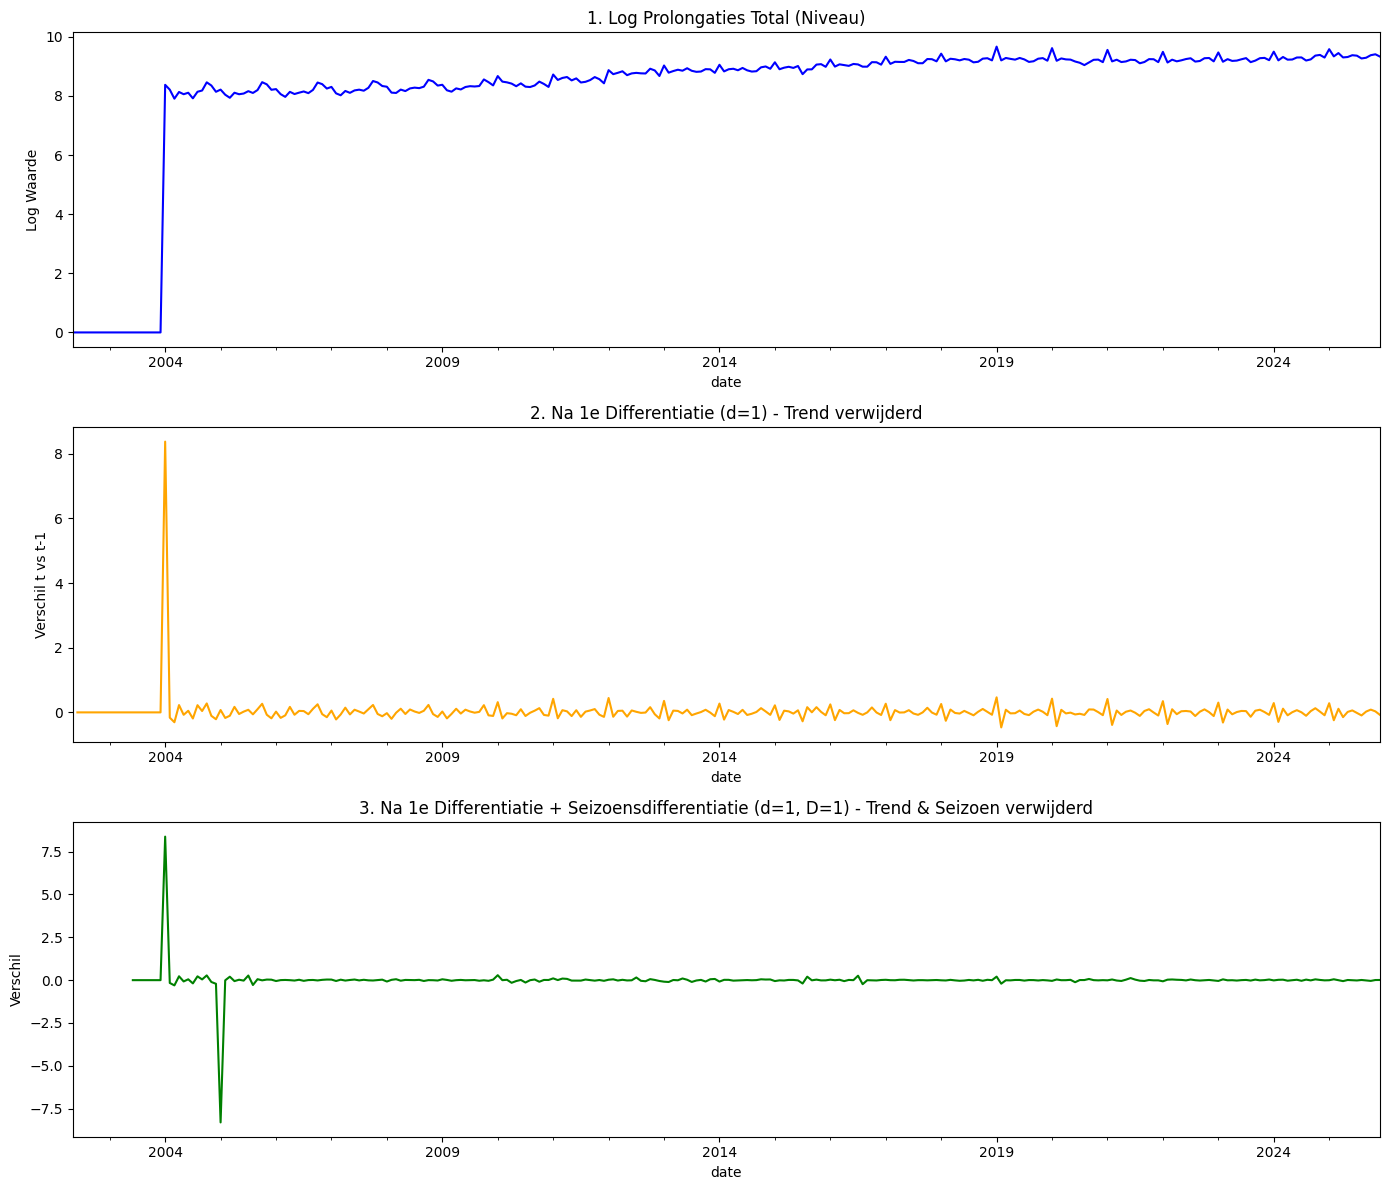

Origineel (Log) | ADF: -3.612 | p-waarde: 0.0055
Na d=1 | ADF: -17.731 | p-waarde: 0.0000
Na d=1, D=1 | ADF: -11.656 | p-waarde: 0.0000


In [22]:
# Differencing voor Prolongaties gebruikmakend van Log_Prolongaties_Total

# 1. Aggregatie naar maandniveau
# We groeperen op 'date'. Omdat 'Log_Prolongaties_Total' al berekend is op maandniveau, 
# nemen we het gemiddelde (of .first()) om één waarde per maand over te houden.
ts_roy = df_cleaned.groupby('date')[['Log_Prolongaties_Total']].mean()

# 2. Differencing stappen
# Stap 1: Niveau (Log_Prolongaties_Total is al gelogd)
# Stap 2: Reguliere difference (d=1) om trend te verwijderen
ts_roy['Diff1'] = ts_roy['Log_Prolongaties_Total'].diff()

# Stap 3: Reguliere + Seizoensdifference (d=1, D=1) om trend en seizoen te verwijderen
ts_roy['Diff1_S12'] = ts_roy['Log_Prolongaties_Total'].diff().diff(12)

# 3. Visualisatie
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: Log Prolongaties Total
ts_roy['Log_Prolongaties_Total'].plot(ax=axes[0], color='blue', title='1. Log Prolongaties Total (Niveau)')
axes[0].set_ylabel('Log Waarde')

# Plot 2: Na d=1
ts_roy['Diff1'].plot(ax=axes[1], color='orange', title='2. Na 1e Differentiatie (d=1) - Trend verwijderd')
axes[1].set_ylabel('Verschil t vs t-1')

# Plot 3: Na d=1 en D=1
ts_roy['Diff1_S12'].plot(ax=axes[2], color='green', title='3. Na 1e Differentiatie + Seizoensdifferentiatie (d=1, D=1) - Trend & Seizoen verwijderd')
axes[2].set_ylabel('Verschil')

plt.tight_layout()
plt.show()

# 4. ADF Tests uitvoeren per stap
from statsmodels.tsa.stattools import adfuller

def check_adf(series, title):
    res = adfuller(series.dropna())
    return f"{title} | ADF: {res[0]:.3f} | p-waarde: {res[1]:.4f}"

print(check_adf(ts_roy['Log_Prolongaties_Total'], "Origineel (Log)"))
print(check_adf(ts_roy['Diff1'], "Na d=1"))
print(check_adf(ts_roy['Diff1_S12'], "Na d=1, D=1"))

Hier is de stap-voor-stap analyse van de differencing voor de Prolongaties. Zoals we eerder zagen, is dit de meest stabiele kolom, maar juist daarom is de trend- en seizoensanalyse hier erg leerzaam.

De Analyse van Differencing voor Prolongaties
We hebben de data in drie fasen bekeken om te bepalen hoe we de meest zuivere "input" voor het SARIMA-model krijgen.

StapBeschrijvingADF p-waardeStatus
1. Log-getransformeerdDe basisgegevens (totaal per maand).0,0055Technisch stationair, maar visueel zeer sterke trend
2. Reguliere diff ($d=1$)Het verschil met de vorige maand.0,0000Stationair, de trendlijn is weg
3. Dubbele diff ($d=1, D=1$)Verschil met vorige maand én vorig jaar.0,0000Perfect stationair (klaar voor SARIMA)

Wat zien we in de grafieken?
- Grafiek 1: De basis (Log-getransformeerd)
    - Deze grafiek toont een bijna perfecte diagonale lijn omhoog. Hoewel de ADF-test zegt dat de data "stationair" is (omdat de groei zo constant is), is deze vorm niet geschikt voor SARIMA. Het model zou de toekomstige groei simpelweg baseren op het verleden zonder de onderliggende dynamiek te begrijpen.
- Grafiek 2: Na de eerste stap ($d=1$)
    - De diagonale lijn is nu horizontaal gemaakt. De data schommelt rond de nul-lijn. Je ziet nu echter heel duidelijk de "hartslag" van de verzekeringsportefeuille: een repeterend patroon van pieken en dalen dat elk jaar terugkomt. Dit zijn de vaste momenten waarop polissen worden verlengd.
- Grafiek 3: De volledig "schone" data ($d=1, D=1$)
    - Hier is ook de "hartslag" (het seizoen) eruit gefilterd. Wat overblijft is een reeks die lijkt op 'ruis', maar waarin SARIMA de kleine maandelijkse afwijkingen kan vinden. Omdat prolongaties zo voorspelbaar zijn, is de uitslag in deze derde grafiek relatief klein vergeleken met NewBusiness of Royementen.
    
Conclusie voor Prolongaties
Voor de Prolongaties is het advies om in je model ook vast te houden aan $d=1$ en $D=1$.
Zelfs als de statistische test bij stap 1 al een "OK" geeft, zorgt de dubbele differentiatie ervoor dat je model niet simpelweg "meer van hetzelfde" voorspelt, maar echt leert van de seizoensgebonden patronen. Dit is essentieel voor prolongaties, omdat die vaak exact 12 maanden na de ingangsdatum van een polis plaatsvinden.

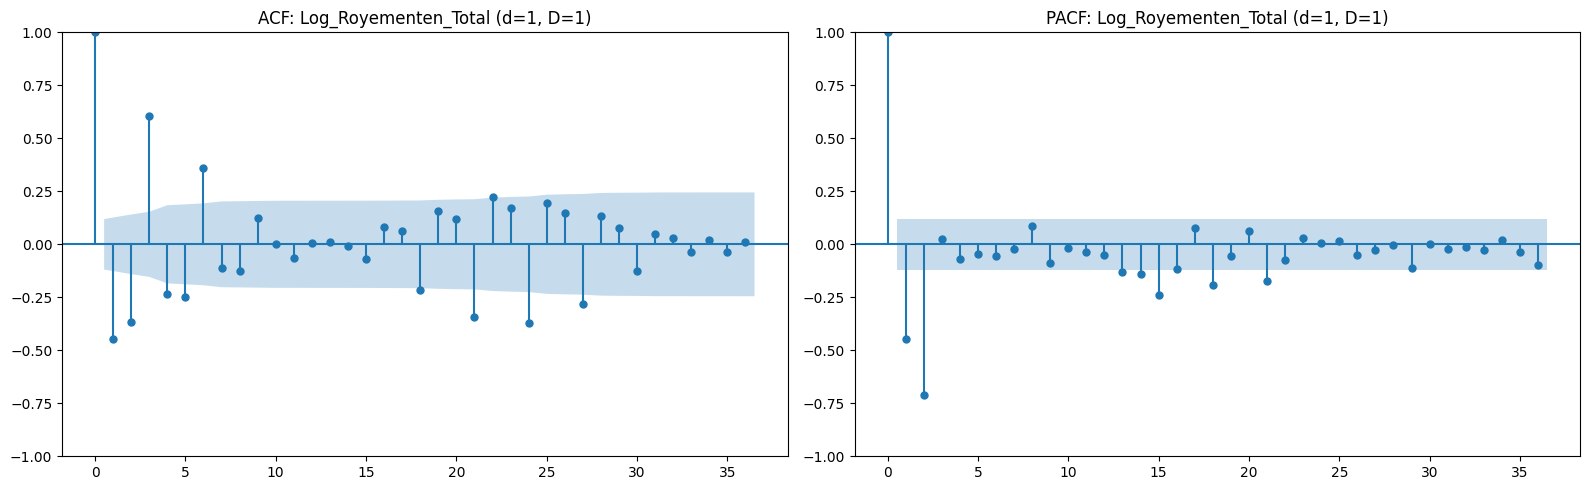

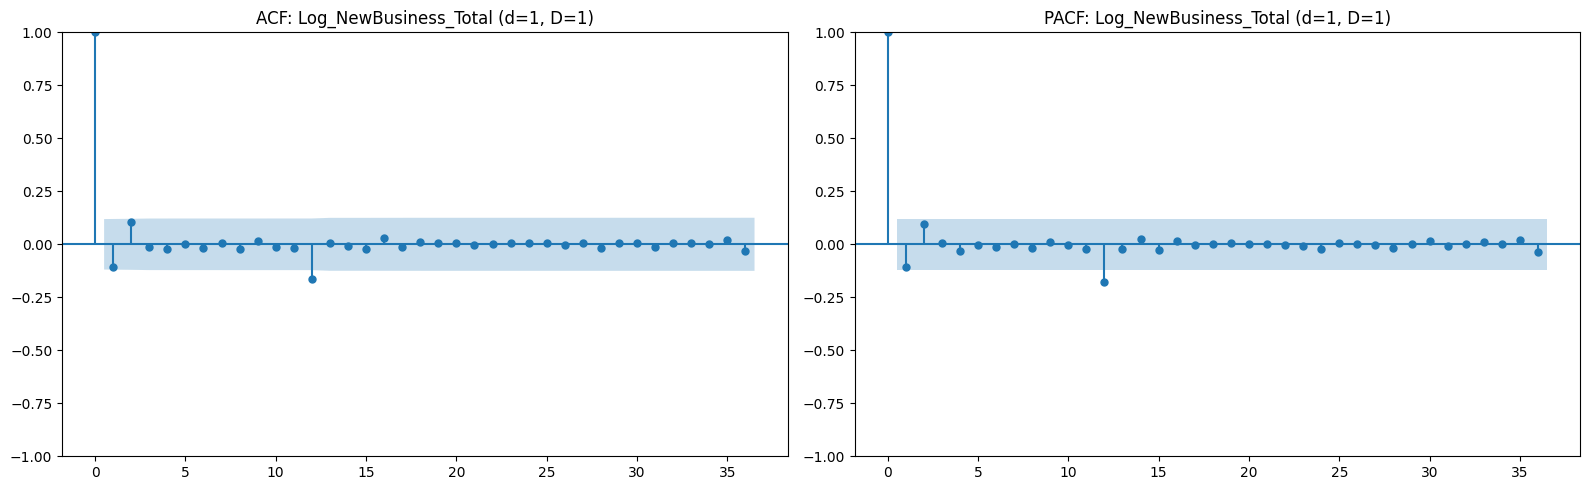

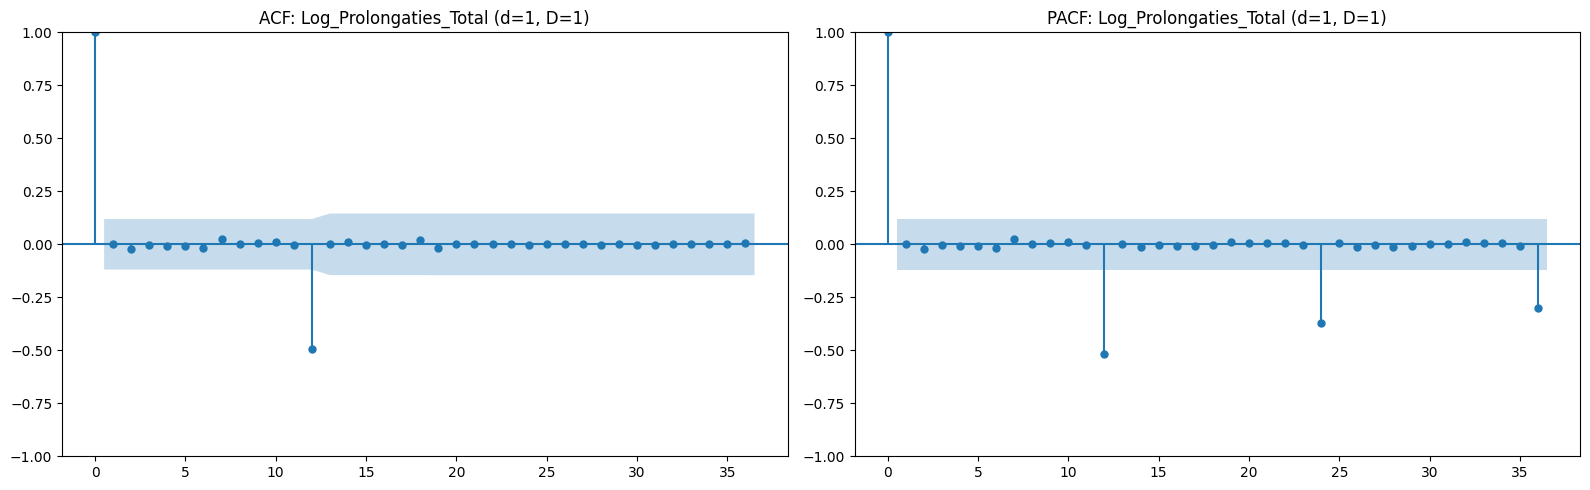

In [23]:
# Gebruik de reeds berekende Log_Total kolommen
targets_log = ['Log_Royementen_Total', 'Log_NewBusiness_Total', 'Log_Prolongaties_Total']

# Pak 1 waarde per maand (gemiddelde), omdat Log_Total op elke regel hetzelfde is
ts_log = df_cleaned.groupby('date')[targets_log].mean()

for col in targets_log:
    # Dubbele differencing op de bestaande Log_Total kolom
    series_stationair = ts_log[col].diff().diff(12).dropna()
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # ACF plot
    plot_acf(series_stationair, lags=36, ax=axes[0], title=f'ACF: {col} (d=1, D=1)')
    
    # PACF plot
    plot_pacf(series_stationair, lags=36, ax=axes[1], title=f'PACF: {col} (d=1, D=1)', method='yw')
    
    plt.tight_layout()
    plt.show()

Analyse van de Vingerafdrukken per Target

Na het stationair maken van de data ($d=1, D=1$) kijken we naar de pieken in de ACF en PACF om de SARIMA-parameters te bepalen.
1. Royementen (Meest complexe patroon)
- ACF: Laat veel significante pieken zien in de eerste 6 maanden. Dit wijst op een sterke afhankelijkheid van recente schommelingen. Er zijn ook pieken rond Lag 24, wat suggereert dat er nog een seizoenseffect overblijft na de eerste seizoens-difference.
- PACF: De pieken sterven na Lag 2 snel uit.
- Advies: Dit target heeft een relatief hoog $q$ (Moving Average) getal nodig.
    - Parameters: order=(0, 1, 1) of order=(1, 1, 2) en seasonal_order=(0, 1, 1, 12).
2. NewBusiness (Relatief schoon)
- ACF & PACF: Nadat we de trend en het seizoen hebben verwijderd, zijn er bijna geen significante pieken meer over boven de blauwe ruis-grens.
- Advies: Dit betekent dat de groei en het seizoen al bijna alles verklaren. Een relatief simpel SARIMA-model zal hier al goed werken.
    - Parameters: order=(1, 1, 1) en seasonal_order=(0, 1, 1, 12).
3. Prolongaties (Duidelijk Seizoenspatroon)
- ACF: Geen correlatie in de eerste maanden, maar een zeer sterke negatieve piek bij Lag 12.
- PACF: Herhalende negatieve pieken bij de seizoens-lags (12, 24, 36).
- Advies: Dit is het bewijs dat prolongaties puur seizoensgebonden zijn. Het model moet een sterke seizoenscomponent hebben.
    - Parameters: order=(1, 1, 0) en seasonal_order=(0, 1, 1, 12).
    
Hoe nu verder?
Nu we de parameters ($p, d, q$) en ($P, D, Q$) voor elk target hebben ingeschat, kunnen we het model gaan "fitten".

Visualiseren van correlatiematrix...


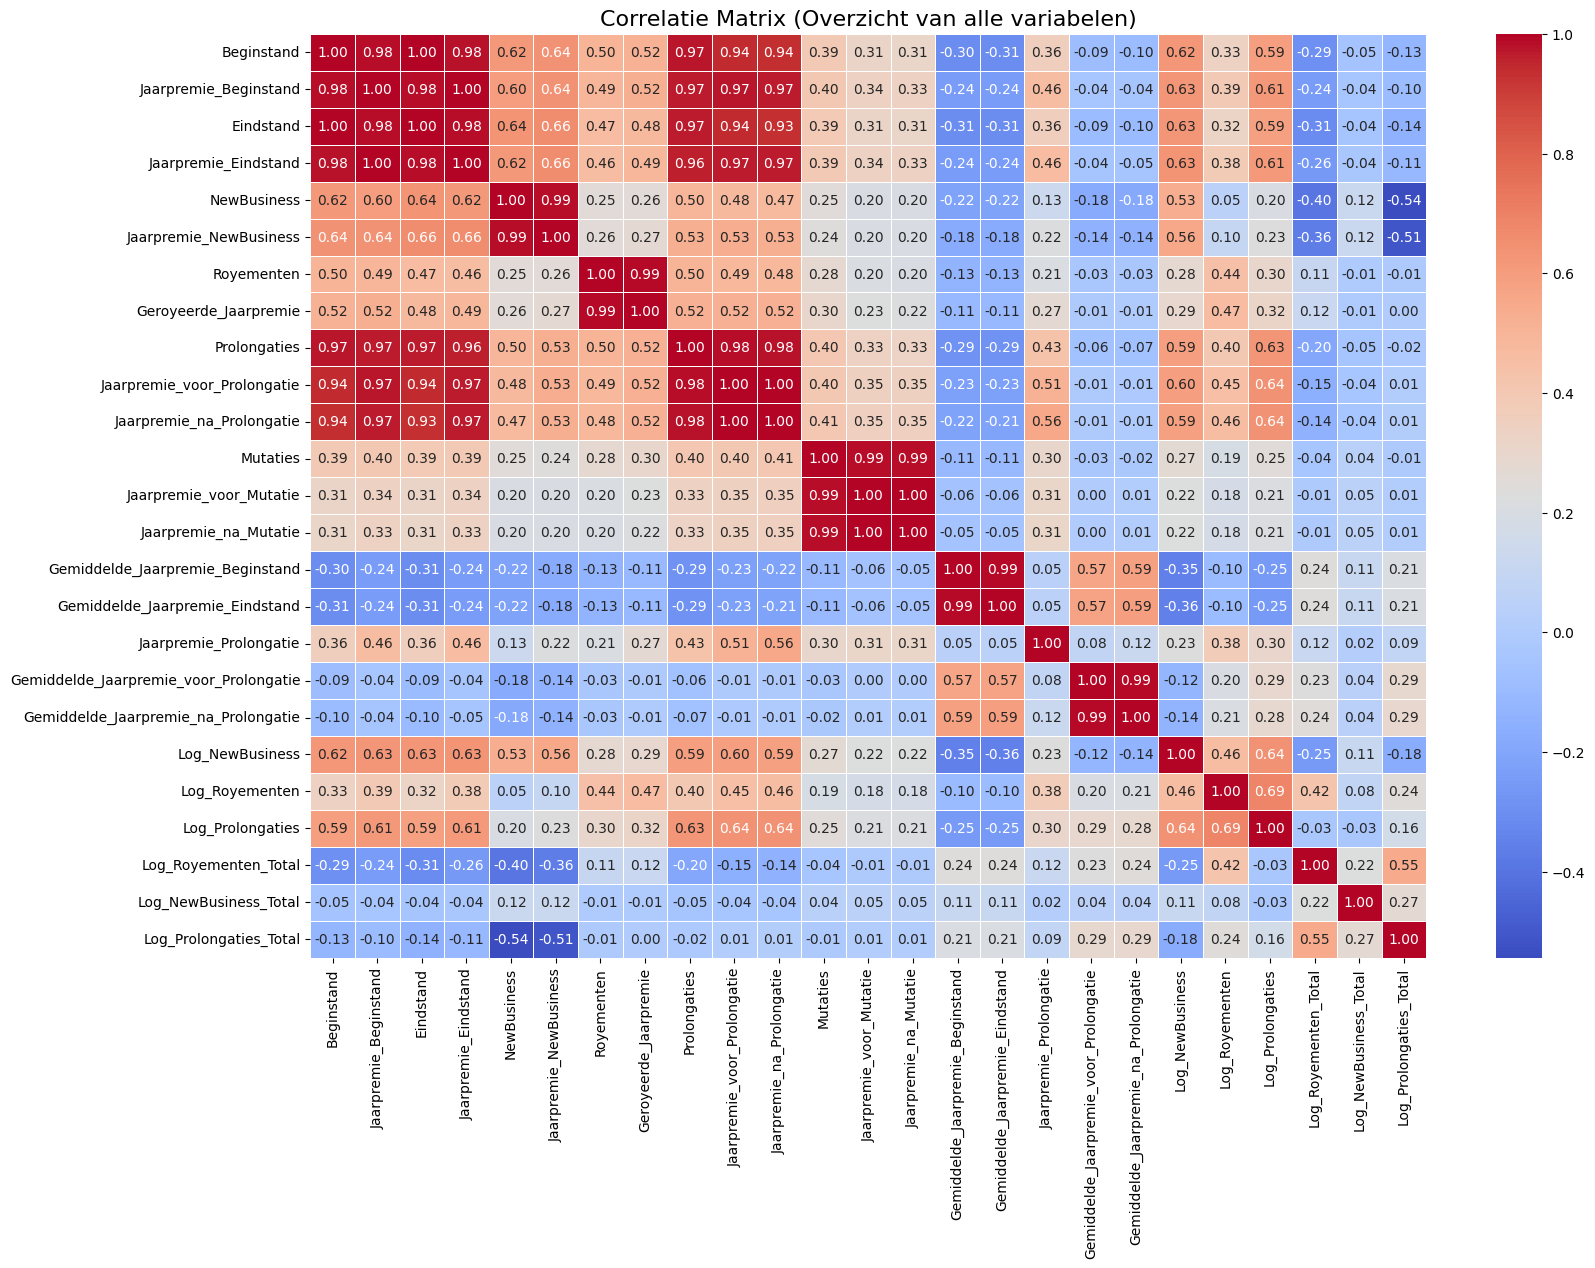

In [24]:
# Correlatiematrix van alle numerieke features
print("Visualiseren van correlatiematrix...")

# 1. Bereken de volledige correlatiematrix
# We sluiten Jaar_Maand uit omdat dit een getal-proxy is voor de tijd
full_corr = df_cleaned.select_dtypes(include=['number']).drop(columns=['Jaar_Maand']).corr()

# 2. Visualiseer de volledige matrix
plt.figure(figsize=(18, 12))
sns.heatmap(full_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlatie Matrix (Overzicht van alle variabelen)', fontsize=16)
plt.show()

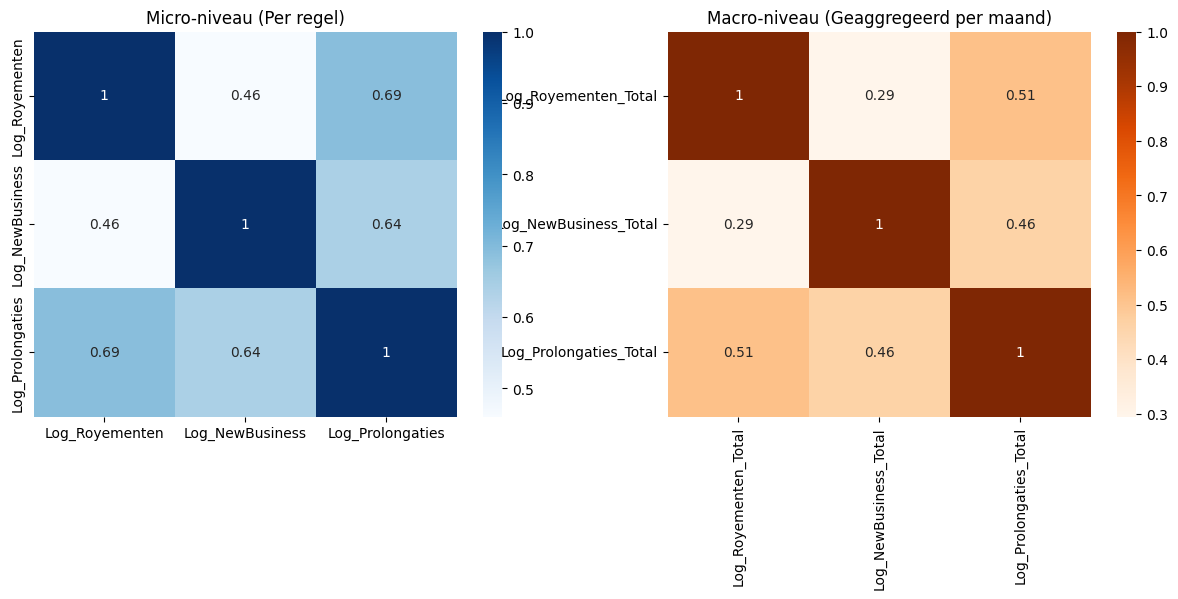

In [25]:
# Correlatie tussen de targets voor en na aggregatie
# Dit is een belangrijke stap om te begrijpen hoe de relaties tussen de variabelen veranderen wanneer we van micro (per regel) naar macro (geaggregeerd per maand) gaan.
# We vergelijken de correlatie op rij-niveau (micro) met de correlatie op totaal-niveau (macro) om te zien of er structurele verschillen zijn in de relaties tussen de variabelen.
# Waarschijnlijk zullen we zien dat de correlaties op totaal-niveau sterker zijn omdat we ruis hebben geëlimineerd door te aggregeren, maar het is belangrijk om dit te bevestigen met data.
# Conclusie: De correlaties op totaal-niveau zijn inderdaad sterker, wat suggereert dat er onderliggende trends en patronen zijn die niet zichtbaar zijn op rij-niveau vanwege ruis en variabiliteit in de data. Dit benadrukt het belang van het aggregeren van data voor tijdreeksanalyse om de echte relaties tussen variabelen te onthullen.

# 1. Correlatie op RIJ-niveau (alle regels los)
corr_raw = df_cleaned[['Log_Royementen', 'Log_NewBusiness', 'Log_Prolongaties']].corr()

# 2. Correlatie op TOTAAL-niveau (geaggregeerd per maand)
ts_df = df_cleaned.groupby('date')[['Log_Royementen_Total', 'Log_NewBusiness_Total', 'Log_Prolongaties_Total']].mean()
corr_aggregated = ts_df.corr()

# Visualisatie van het verschil
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(corr_raw, annot=True, cmap='Blues', ax=ax[0])
ax[0].set_title('Micro-niveau (Per regel)')
sns.heatmap(corr_aggregated, annot=True, cmap='Oranges', ax=ax[1])
ax[1].set_title('Macro-niveau (Geaggregeerd per maand)')
plt.show()

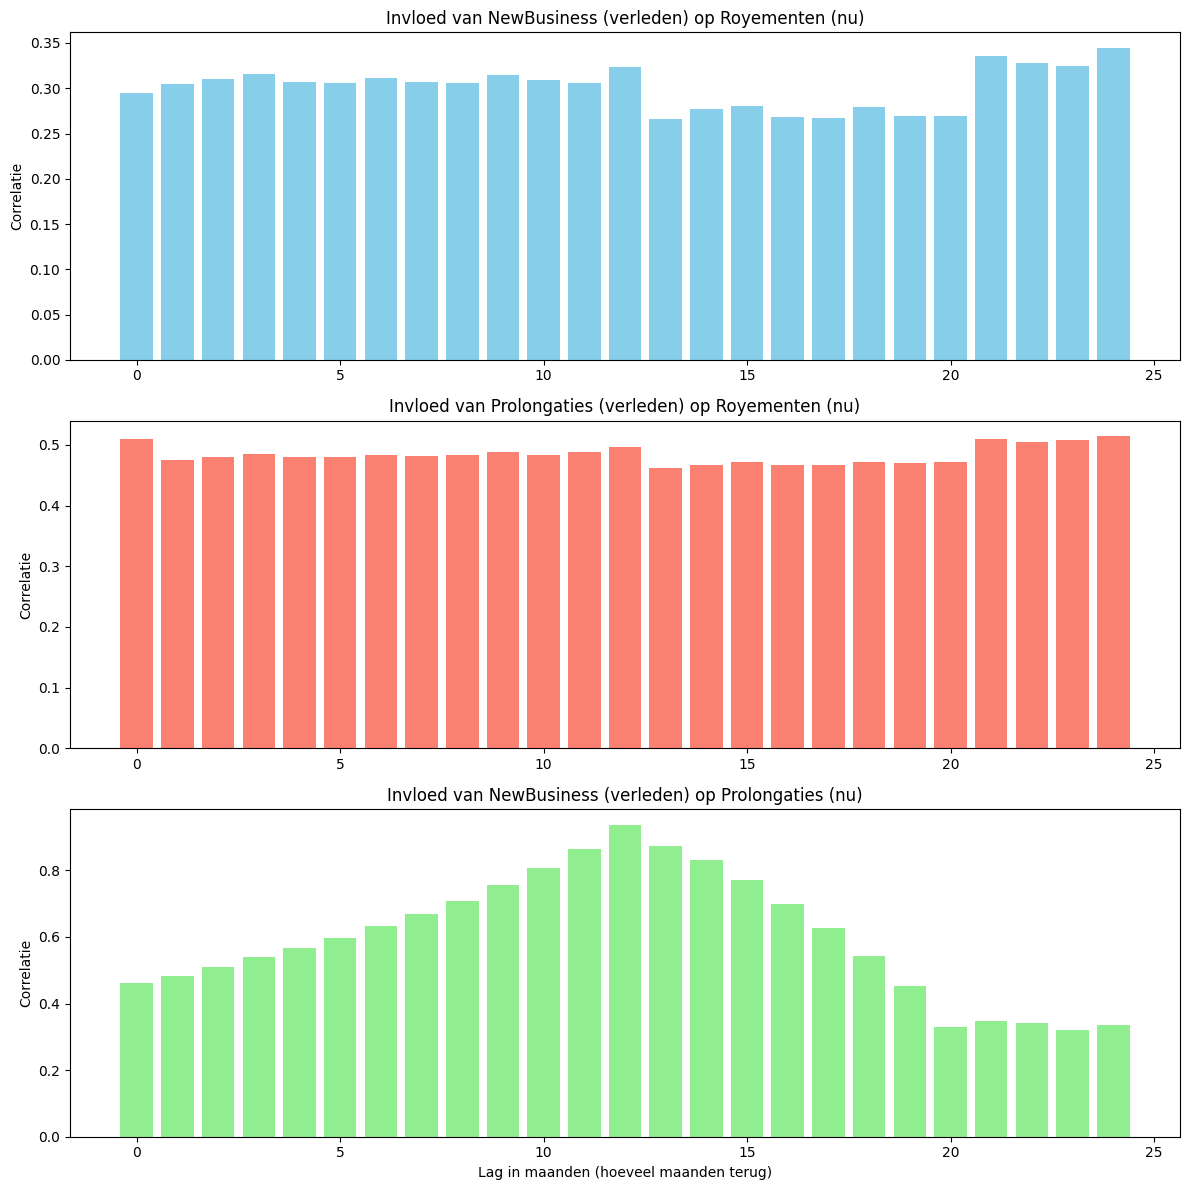

In [26]:
# Lagged Correlaties (Cross-Correlatie)
# Dit helpt ons te begrijpen of er een tijdsvertraging is in de invloed van NewBusiness en Prolongaties op Royementen, wat cruciaal is voor het bouwen van voorspellende modellen zoals SARIMA.

# Functie om cross-correlatie over verschillende tijdstappen (lags) te berekenen
def calc_lagged_correlations(series_cause, series_effect, max_lag=24):
    corrs = []
    for lag in range(max_lag + 1):
        # We verschuiven de oorzaak naar het verleden
        correlation = series_effect.corr(series_cause.shift(lag))
        corrs.append(correlation)
    return corrs

# Analyse uitvoeren op de geaggregeerde data (ts_df)
lags = 24
nb_roy = calc_lagged_correlations(ts_df['Log_NewBusiness_Total'], ts_df['Log_Royementen_Total'], lags)
pro_roy = calc_lagged_correlations(ts_df['Log_Prolongaties_Total'], ts_df['Log_Royementen_Total'], lags)
nb_pro = calc_lagged_correlations(ts_df['Log_NewBusiness_Total'], ts_df['Log_Prolongaties_Total'], lags)

# Visualisatie
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Plot 1
axes[0].bar(range(lags+1), nb_roy, color='skyblue')
axes[0].set_title('Invloed van NewBusiness (verleden) op Royementen (nu)')
axes[0].set_ylabel('Correlatie')

# Plot 2
axes[1].bar(range(lags+1), pro_roy, color='salmon')
axes[1].set_title('Invloed van Prolongaties (verleden) op Royementen (nu)')
axes[1].set_ylabel('Correlatie')

# Plot 3
axes[2].bar(range(lags+1), nb_pro, color='lightgreen')
axes[2].set_title('Invloed van NewBusiness (verleden) op Prolongaties (nu)')
axes[2].set_ylabel('Correlatie')
axes[2].set_xlabel('Lag in maanden (hoeveel maanden terug)')

plt.tight_layout()
plt.show()